In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import spearmanr, kendalltau, chi2_contingency, pointbiserialr
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.stattools import pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Machine Learning & Forecasting
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

# Preprocessing & Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Model selection
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

# Metrics
from sklearn.metrics import mean_squared_error, r2_score



pd.set_option('display.max_columns', 200)

C:\Users\bramv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# Opdracht 2: Voorspel verhuuraantallen

#### Simple
| Teamsleden | Kaggle gebruikernaam | 
|---------|:--------| 
|   Bram Veelenturf   | datasethacker   | 
|   Maan Lammers  | Manu Lammers   | 
|   Nika de Vries  | Nika de Vries   | 
| Thida Churam| Thidarat Churam |


## EDA

- Toon de datatypes en basisstatistieken van iedere kolom.
- Voeg tijdserie elementen toe en gebruik passende visualisaties om relevante
patronen zichtbaar te maken.
- Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de
afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties.
- Beschrijf wat de belangrijkste bevindingen zijn van de EDA.
- Sommige regels en/of kolommen zijn soms niet relevant voor machine learning of bevatten
onjuiste of missende waardes. Schoon, zo nodig, de data op

In [2]:
df = pd.read_csv('train.csv')
df

date_hour  holiday  weathersit  temp   atemp   hum  \
0      2011-01-01 00:00:00        0           1  0.24  0.2879  0.81   
1      2011-01-01 01:00:00        0           1  0.22  0.2727  0.80   
2      2011-01-01 02:00:00        0           1  0.22  0.2727  0.80   
3      2011-01-01 03:00:00        0           1  0.24  0.2879  0.75   
4      2011-01-01 04:00:00        0           1  0.24  0.2879  0.75   
...                    ...      ...         ...   ...     ...   ...   
16632  2012-11-30 19:00:00        0           1  0.32  0.3485  0.66   
16633  2012-11-30 20:00:00        0           1  0.32  0.3485  0.66   
16634  2012-11-30 21:00:00        0           1  0.30  0.3182  0.75   
16635  2012-11-30 22:00:00        0           1  0.30  0.3333  0.75   
16636  2012-11-30 23:00:00        0           2  0.30  0.3182  0.75   

       windspeed  cnt  
0         0.0000   16  
1         0.0000   40  
2         0.0000   32  
3         0.0000   13  
4         0.0000    1  
...          ...  ...  
16632     0.0000  377  
16633     0.0000  245  
16634     0.0896  183  
16635     0.0000  163  
16636     0.0896  110  

[16637 rows x 8 columns]

#### data types

In [3]:
df.dtypes

date_hour      object
holiday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Basis statistiek

In [4]:
df.describe()

holiday    weathersit          temp         atemp           hum  \
count  16637.000000  16637.000000  16637.000000  16637.000000  16637.000000   
mean       0.028671      1.415580      0.504745      0.482608      0.624756   
std        0.166885      0.637298      0.192369      0.171557      0.193227   
min        0.000000      1.000000      0.020000      0.000000      0.000000   
25%        0.000000      1.000000      0.340000      0.333300      0.470000   
50%        0.000000      1.000000      0.520000      0.500000      0.620000   
75%        0.000000      2.000000      0.660000      0.621200      0.780000   
max        1.000000      4.000000      1.000000      1.000000      1.000000   

          windspeed           cnt  
count  16637.000000  16637.000000  
mean       0.190310    190.477009  
std        0.121915    182.026755  
min        0.000000      1.000000  
25%        0.104500     41.000000  
50%        0.194000    143.000000  
75%        0.253700    282.000000  
max        0.850700    977.000000

#### Datetime omzetting

In [5]:
df["date_hour"] = pd.to_datetime(df["date_hour"])

#Tijd elementen toevoegen
df["date"] = df["date_hour"].dt.day
df['year'] = df['date_hour'].dt.year
df['month'] = df['date_hour'].dt.month
df['hour'] = df['date_hour'].dt.hour
df['dag'] = df['date_hour'].dt.dayofweek

# zet date_hour om naar een datetime-index
df.set_index('date_hour', inplace=True)

df

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000    1   
...                      ...         ...   ...     ...   ...        ...  ...   
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000  377   
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000  245   
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183   
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000  163   
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110   

                     date  year  month  hour  dag  
date_hour                                          
2011-01-01 00:00:00     1  2011      1     0    5  
2011-01-01 01:00:00     1  2011      1     1    5  
2011-01-01 02:00:00     1  2011      1     2    5  
2011-01-01 03:00:00     1  2011      1     3    5  
2011-01-01 04:00:00     1  2011      1     4    5  
...                   ...   ...    ...   ...  ...  
2012-11-30 19:00:00    30  2012     11    19    4  
2012-11-30 20:00:00    30  2012     11    20    4  
2012-11-30 21:00:00    30  2012     11    21    4  
2012-11-30 22:00:00    30  2012     11    22    4  
2012-11-30 23:00:00    30  2012     11    23    4  

[16637 rows x 12 columns]

Text(0.5, 1.0, 'Maandelijkse verhuurd product per jaar')

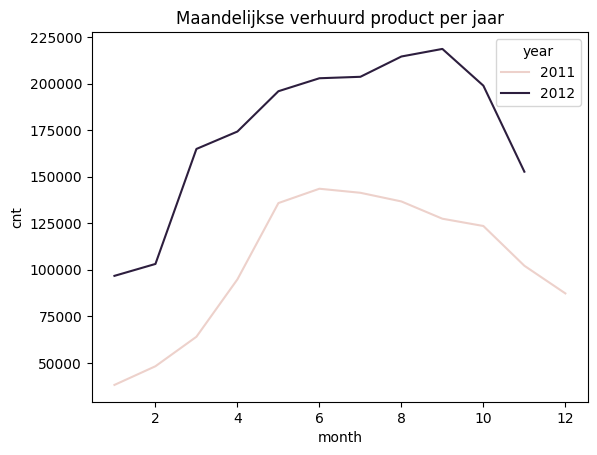

In [6]:
# Relevante patronen visualisatie
maandelijk = df.groupby(['year', 'month'])['cnt'].sum().reset_index()

sns.lineplot(data=maandelijk, x='month', y='cnt', hue='year')
plt.title('Maandelijkse verhuurd product per jaar')

In deze grafiek is een duidelijk patroon te zien tussen 2011 en 2012. In 2012 werden er meer fietsen verhuurd dan in 2011. De lijn begint in januari te stijgen en bereikt zijn hoogste punt in september, waarna er een daling optreedt. Het product wordt dus vooral verkocht tussen juni en september, waarschijnlijk omdat dit de vakantieperiode is. In 2011 werd het product het meest verkocht in juni, waarna de verkoop weer daalde.

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\727510690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=df['weathersit'].map(cal), y='cnt', palette=kleuren, errorbar=None)


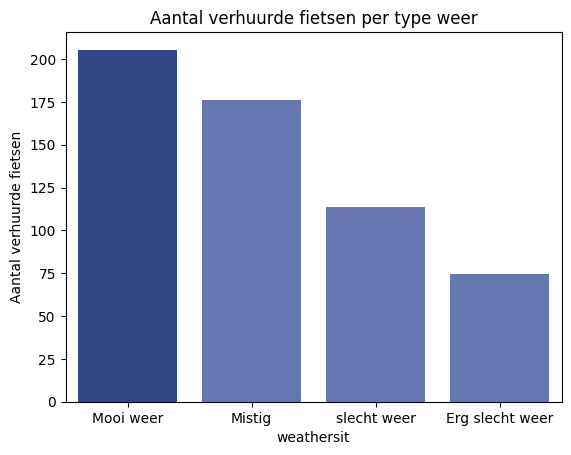

In [7]:
cal = {1: 'Mooi weer', 2: 'Mistig', 3: 'slecht weer', 4: 'Erg slecht weer'}
kleuren = ["#253e95","#5B70BE",'#5B70BE','#5B70BE']

sns.barplot(data=df, x=df['weathersit'].map(cal), y='cnt', palette=kleuren, errorbar=None)

plt.title('Aantal verhuurde fietsen per type weer')
plt.xlabel('weathersit')
plt.ylabel('Aantal verhuurde fietsen')
plt.show()

Deze barchart toont het gemiddelde aantal verhuurde cnt per type weerconditie. Op de x-as staan de verschillende weersomstandigheden, terwijl de y-as het gemiddelde aantal verhuurde fietsen weergeeft. Er is een duidelijke negatieve relatie tussen de kwaliteit van het weer en het aantal verhuurde product. Hoe slechter het weer, hoe minder mensen het fiets huren. 

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\5936719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['dag'].map(cal), y='cnt', palette=kleuren, order=['Ma', 'Di', 'Wo', 'Don', 'Vr', 'Sat', 'Zon'])


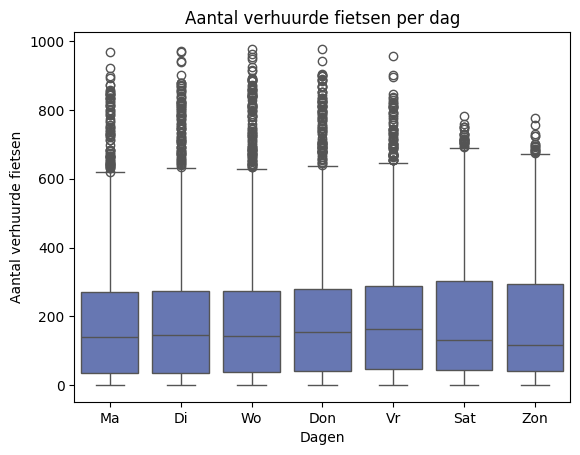

In [8]:
cal = {0:'Ma', 1:'Di', 2:'Wo', 3:'Don', 4:'Vr', 5:'Sat', 6:'Zon'}
kleuren = ["#5B70BE","#5B70BE",'#5B70BE','#5B70BE', "#5B70BE", "#5B70BE", "#5B70BE"]


sns.boxplot(data=df, x=df['dag'].map(cal), y='cnt', palette=kleuren, order=['Ma', 'Di', 'Wo', 'Don', 'Vr', 'Sat', 'Zon'])
plt.title('Aantal verhuurde fietsen per dag')
plt.xlabel('Dagen')
plt.ylabel('Aantal verhuurde fietsen')
plt.show()

In deze boxplot is een lichte stijging te zien van maandag tot en met vrijdag in het gemiddelde aantal verhuurde fietsen per dag. Daarna daalt het opnieuw. Dit komt waarschijnlijk doordat mensen in het weekend vaker thuis blijven.

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\1459270097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['dag'].map(cal), y='temp', palette=kleuren, order=['Ma', 'Di', 'Wo', 'Don', 'Vr', 'Sat', 'Zon'])


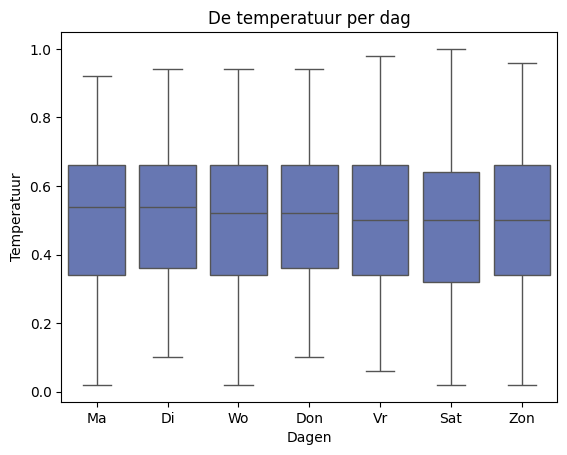

In [9]:
cal = {0:'Ma', 1:'Di', 2:'Wo', 3:'Don', 4:'Vr', 5:'Sat', 6:'Zon'}
kleuren = ["#5B70BE","#5B70BE",'#5B70BE','#5B70BE', "#5B70BE", "#5B70BE", "#5B70BE"]


sns.boxplot(data=df, x=df['dag'].map(cal), y='temp', palette=kleuren, order=['Ma', 'Di', 'Wo', 'Don', 'Vr', 'Sat', 'Zon'])
plt.title('De temperatuur per dag')
plt.xlabel('Dagen')
plt.ylabel('Temperatuur')
plt.show()

De temperatuur is vrij consistent over alle dagen van de week. De mediaan ligt rond dezelfde waarde, wat aangeeft dat er geen sterke temperatuurverschillen tussen de dagen zijn. De spreiding is vergelijkbaar voor alle dagen. Dit betekent dat de dagelijkse temperatuurvariaties tussen de dagen vrijwel gelijk zijn.

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\260547153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


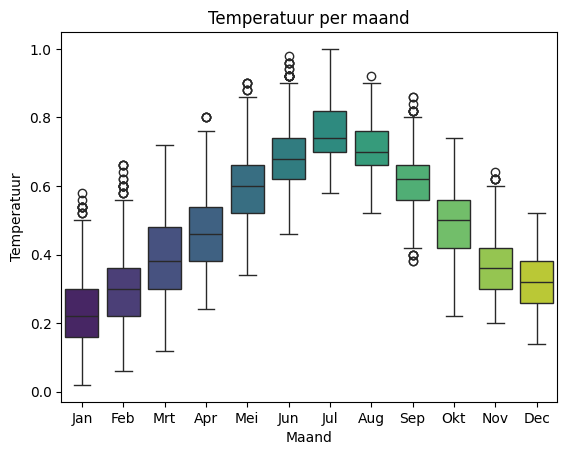

In [10]:
nl_maanden = ['Jan','Feb','Mrt','Apr','Mei','Jun','Jul','Aug','Sep','Okt','Nov','Dec']


sns.boxplot(
    data=df,
    x=df['month'].map(lambda x: nl_maanden[x-1]),
    y='temp',
    palette=sns.color_palette("viridis", 12),
    order=nl_maanden
)

plt.title('Temperatuur per maand')
plt.xlabel('Maand')
plt.ylabel('Temperatuur')
plt.show()

Wanneer er gekijken naar de temperatuur per maand, wordt duidelijk dat er wel sprake is van temperatuurverschillen. Vanaf maart/april stijgt de temperatuur geleidelijk tot en met juli, waarna deze weer begint te dalen. Deze trend komt overeen met de verhuurdata, wat wijst op een mogelijke correlatie tussen temperatuur en verhuur.

#### Relatie tussen onafhangkelijk- en afhangkelijk waarde
| Kolomnaam   | Beschrijving                          | Meetniveau        |
|--------------|----------------------------------------|-------------------|
| holiday      | Indicator of het een feestdag is | Nominaal          |
| weathersit   | Weerconditie  | Ordinaal       |
| temp         | Genormaliseerde temperatuur     | Interval          |
| atemp        | Gevoelstemperatuur          | Interval          |
| hum          | Luchtvochtigheid               | Interval          |
| windspeed    | Windsnelheid                      | Interval          |
| cnt          | Aantal fietsverhuurtransacties per uur | Ratio             |


#### Corelatiematrix

In [11]:
# holiday - cnt (norminaal en ratio)
r_pb, p = pointbiserialr(df['holiday'], df['cnt'])
print(f"(holiday - cnt) Point-Biserial r = {r_pb:.3f}")
print('_______________________________________')

# weathersit - cnt (orminaal en ratio)
rho, p = spearmanr(df['weathersit'], df['cnt'])
print(f"(weathersit - cnt) Spearman's rho = {rho:.2f}")
print('_______________________________________')

# temp - cnt (interval - ratio) geen linair
rho, p = spearmanr(df['temp'], df['cnt'])
print(f"(temp - cnt) Spearman's rho = {rho:.2f}")
print('_______________________________________')

# atemp - cnt (interval - ratio) geen linair
rho, p = spearmanr(df['atemp'], df['cnt'])
print(f"(atemp - cnt) Spearman's rho = {rho:.2f}")
print('_______________________________________')

# hum - cnt (interval - ratio) geen linair
rho, p = spearmanr(df['hum'], df['cnt'])
print(f"(hum - cnt) Spearman's rho = {rho:.2f}")
print('_______________________________________')

# windspeed - cnt (interval - ratio) geen linair
rho, p = spearmanr(df['windspeed'], df['cnt'])
print(f"(windspeed - cnt) Spearman's rho = {rho:.2f}")


(holiday - cnt) Point-Biserial r = -0.027
_______________________________________
(weathersit - cnt) Spearman's rho = -0.12
_______________________________________
(temp - cnt) Spearman's rho = 0.43
_______________________________________
(atemp - cnt) Spearman's rho = 0.43
_______________________________________
(hum - cnt) Spearman's rho = -0.36
_______________________________________
(windspeed - cnt) Spearman's rho = 0.13


ChatGPT 4.0: Prompt 2, Pairplot maken in Python https://chatgpt.com/share/69092851-77c4-8009-b73e-5f5c7dac5091

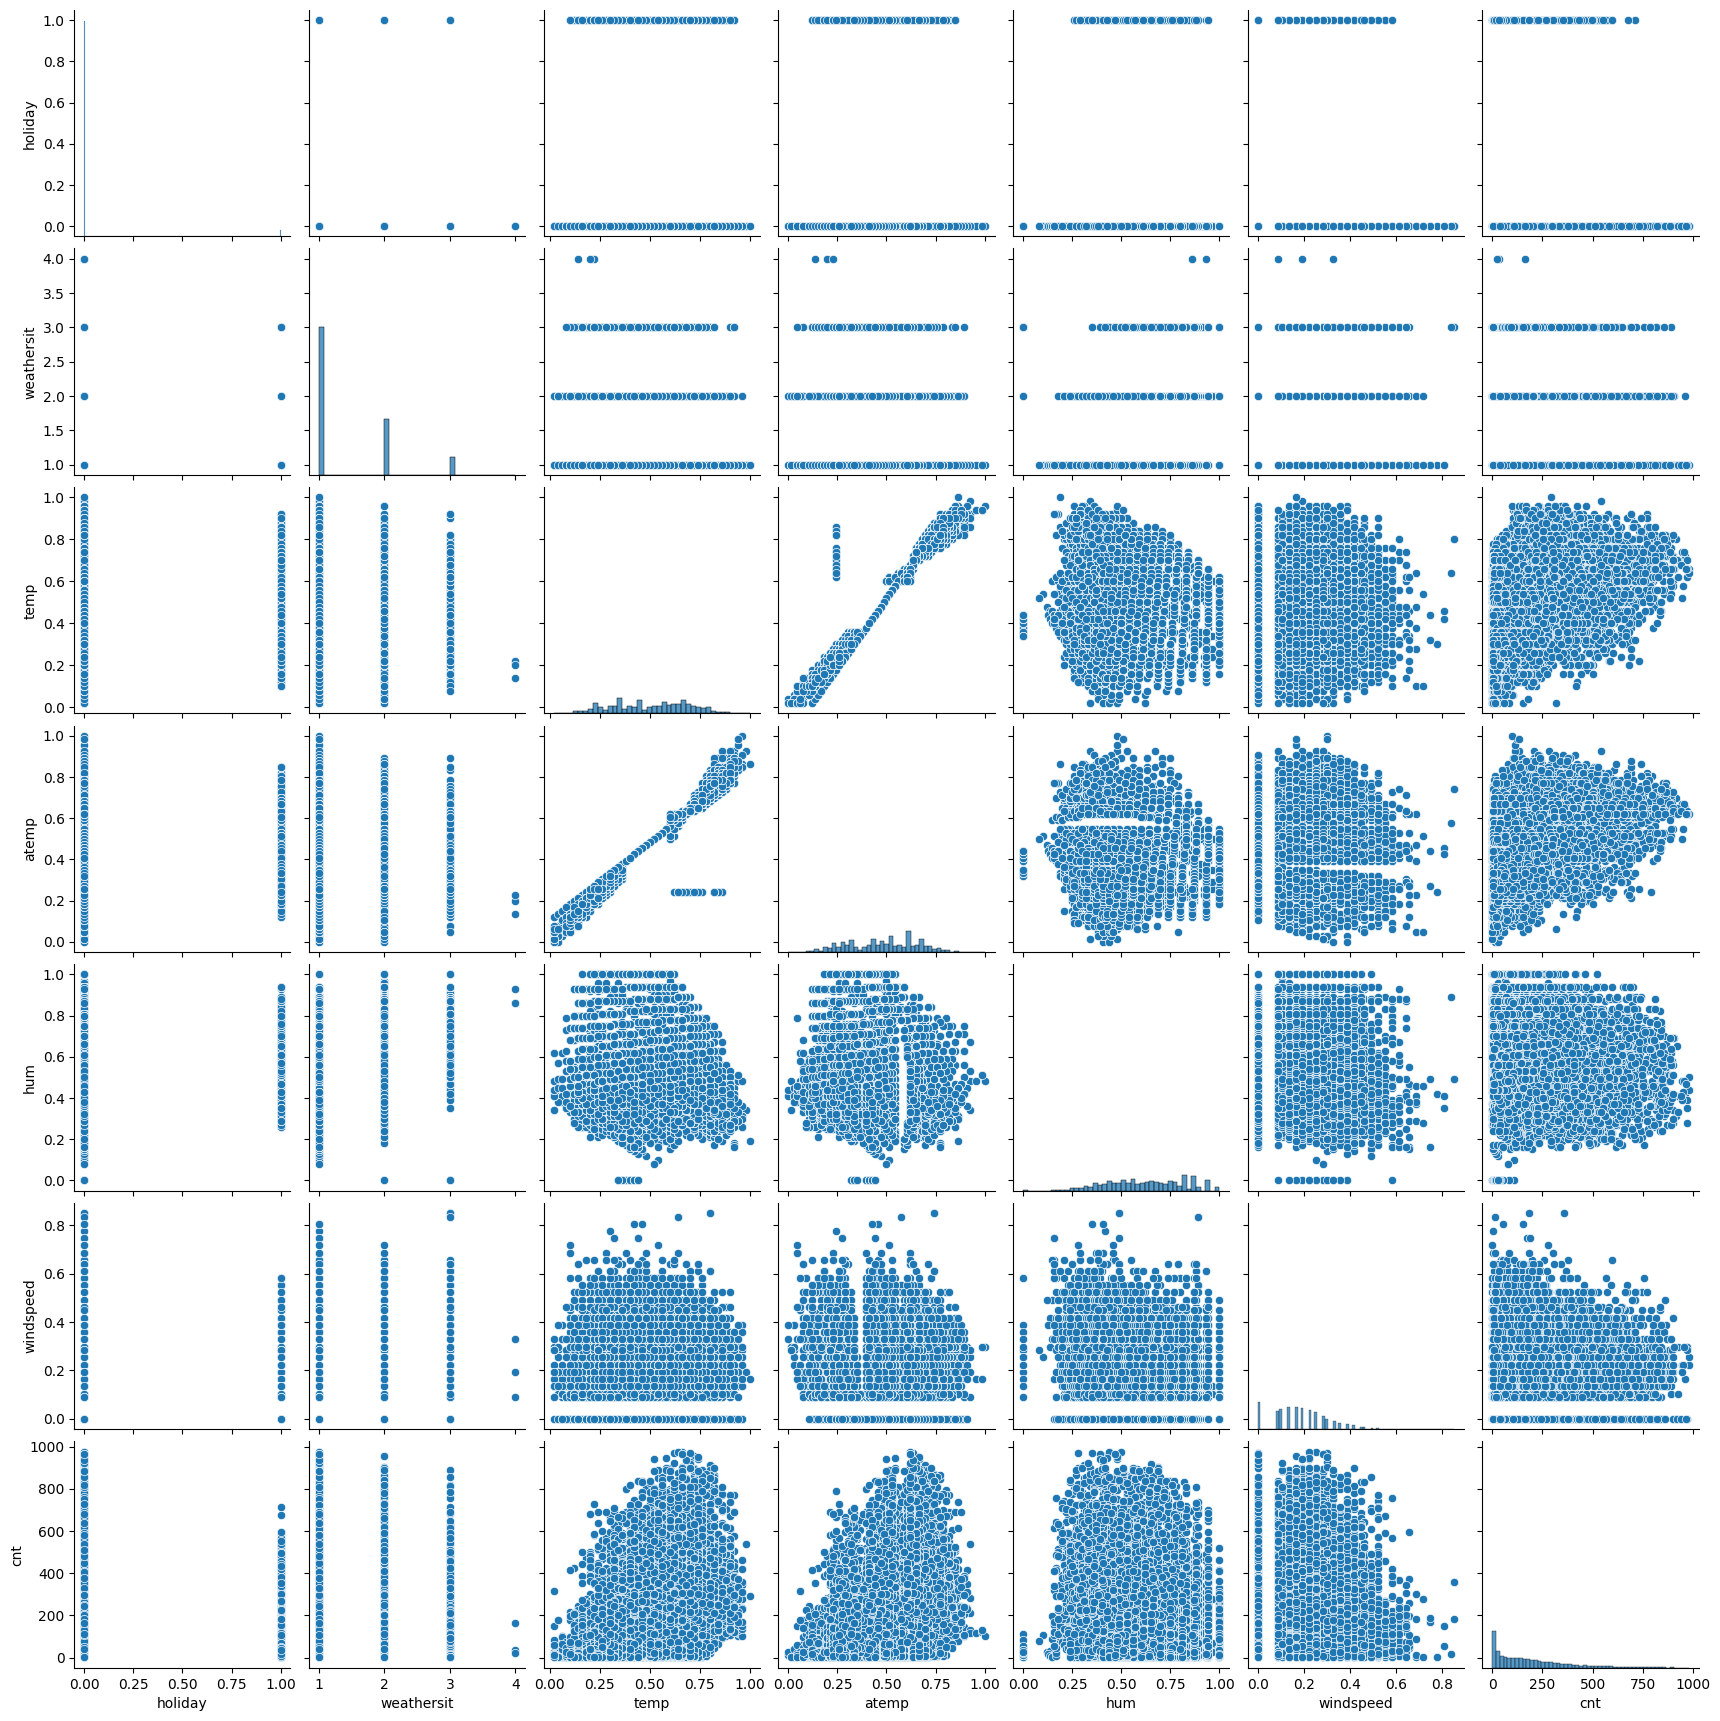

In [12]:
#sns.pairplot(df[['hour','date','month','year','temp', 'atemp', 'hum', 'windspeed', 'cnt']])
sns.pairplot(df[['holiday','weathersit','temp', 'atemp', 'hum', 'windspeed', 'cnt']])

#### Bevindingen 

- (holiday - cnt) : Point-Biserial r = -0.027. Deze correlatiemaat wordt gebruikt om te onderzoeken in hoeverre een nominale variabele correleert met een rationele variabele. In dit geval is er een zeer zwakke negatieve correlatie. Dit betekent dat het product iets minder wordt verhuurd op feestdagen, maar het effect is klein.

- (weathersit - cnt) Spearman's rho = -0.12. Deze correlatiemaat wordt gebruikt om de relatie tussen een ordinale en een rationele variabele te meten. In dit geval is er sprake van een zwakke negatieve correlatie. Dit houdt in dat het product minder wordt verhuurd bij slechter weer.

- (temp - cnt) Spearman's rho = 0.43. Deze correlatiemaat wordt gebruikt om de relatie tussen een intervalvariabele en een rationele variabele te analyseren, wanneer er geen lineair verband wordt verondersteld. In dit geval is er een redelijk sterke positieve correlatie. Dit betekent dat het product vaker wordt verhuurd bij hogere temperaturen.

- (atemp (gevoelstemperatuur) - cnt) Spearman's rho = 0.43. Deze correlatiemaat wordt eveneens gebruikt om de relatie tussen een intervalvariabele en een rationele variabele te meten zonder aanname van lineariteit. De correlatie is redelijk positief, net als bij de temperatuurkolom. Dat is logisch, want als de temperatuur hoger is, voelt het ook warmer aan. Dit betekent dat het product vaker wordt verhuurd bij een hogere gevoelstemperatuur.

- (hum (luchtvochtigheid) - cnt) Spearman's rho = -0.36. Ook hier wordt Spearman’s rho gebruikt om de relatie tussen een intervalvariabele en een rationele variabele te meten zonder lineair verband. In dit geval is er een zwakke negatieve correlatie. Dit houdt in dat het product minder vaak wordt verhuurd bij hogere luchtvochtigheid.

- (windspeed - cnt) Spearman's rho = 0.13. Deze correlatiemaat wordt gebruikt voor het meten van de relatie tussen een intervalvariabele en een rationele variabele zonder veronderstelling van lineariteit. In dit geval is er een lichte positieve correlatie. Dit betekent dat het product iets vaker wordt verhuurd bij hogere windsnelheden, maar het effect is klein.


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'dag'}>]], dtype=object)

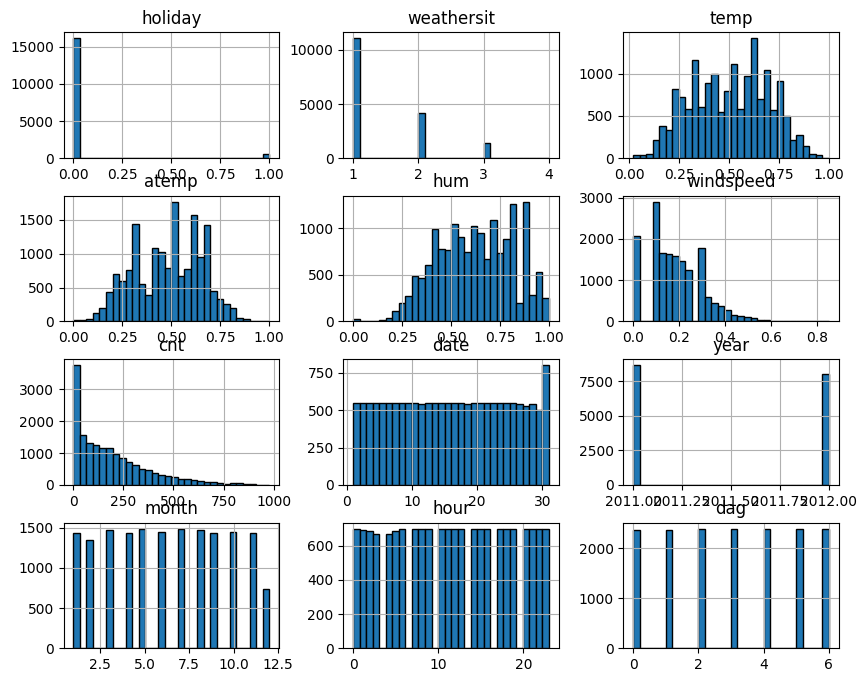

In [13]:
# histplot voor kijken of de data normaal verdeelt is
df=df.select_dtypes(include= 'number')
df.hist(bins=30, figsize=(10, 8), edgecolor="black")

In [14]:
# er is geen missende waarde
print(df.isnull().sum())
print('__________________________________')

#onjuiste waarde zoeken
atemp = df[(df['atemp'] == 0) & (df['temp'] > 0)]
hum = df[df['hum'] == 0]
wind = df[df['windspeed'] == 0]


print("(atemp == 0 & temp > 0):", len(atemp)) # ja
print("(hum == 0):", len(hum)) #nee
print("(windspeed == 0):", len(wind)) #ja

holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
date          0
year          0
month         0
hour          0
dag           0
dtype: int64
__________________________________
(atemp == 0 & temp > 0): 2
(hum == 0): 22
(windspeed == 0): 2072


In [15]:
#Imputeren / verwijderen
df = df[~((df['atemp'] == 0) & (df['temp'] > 0))]

median_hum = df[df['hum'] > 0]['hum'].median()
df.loc[df['hum'] == 0, 'hum'] = median_hum

median_wind = df[df['windspeed'] > 0]['windspeed'].median()
df.loc[df['windspeed'] == 0, 'windspeed'] = median_wind

#nog een keer kijken
atemp = df[(df['atemp'] == 0) & (df['temp'] > 0)]
hum = df[df['hum'] == 0]
wind = df[df['windspeed'] == 0]


print("(atemp == 0 & temp > 0):", len(atemp)) # ja
print("(hum == 0):", len(hum)) #nee
print("(windspeed == 0):", len(wind)) #ja

(atemp == 0 & temp > 0): 0
(hum == 0): 0
(windspeed == 0): 0


Het aantal onjuiste waarden voor temperatuur en gevoelstemperatuur bedraagt slechts 2. Deze mogen worden verwijderd.

Het aantal onjuiste waarden voor de luchtvochtigheid bedraagt 22. We hebben onderzocht dat een luchtvochtigheid van 0 niet mogelijk is. Daarom hebben we deze waarden geïmputeerd met de mediaan, aangezien de data niet normaal verdeeld is.

Het aantal onjuiste waarden voor de windsnelheid bedraagt 2072. We hebben vastgesteld dat een windsnelheid van 0 mogelijk is. Het kan echter ook een placeholder zijn. Daarom hebben we ervoor gekozen om deze waarden te imputeren.

## Time series feature engineering 

- Er zijn diverse soorten tijdseries features die je kunt toevoegen aan de data. Denk hierbij
onder andere aan trend, seizoenspatronen en cycli.

- Voeg tijdserie features toe aan de dataset en onderzoek wat de invloed is van deze features,
samen met de andere features, op de voorspellingen.
- De volgende zaken zijn hierbij duidelijk zichtbaar onderzocht en uitgelegd:
    - Onderzoek naar seizoenspatronen met Fourier analyse.
    - Onderzoek naar trends
    - Onderzoek naar cycli en autocorrelatie
    - Onderzoek naar andere tijdsgebaseerde features.
- Deze opdracht hangt sterk samen met de opdracht 3 (modelleren). Je zult na het toevoegen
van features moeten gaan modelleren om te achterhalen wat de invloed van de features is.
Daarna zul je waarschijnlijk weer teruggaan naar deze opdracht om nieuwe features uit te
proberen. Dit is een iteratief proces. Zorg ervoor dat je uitwerking duidelijk maakt hoe jullie
tot de uiteindelijke keuze voor de features en model(len) zijn gekomen

In [16]:
df_fe = df.copy()
df_fe.index = pd.to_datetime(df_fe.index)
df_fe = df_fe.asfreq("H")

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\2682903485.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_fe = df_fe.asfreq("H")


<Figure size 1200x600 with 0 Axes>

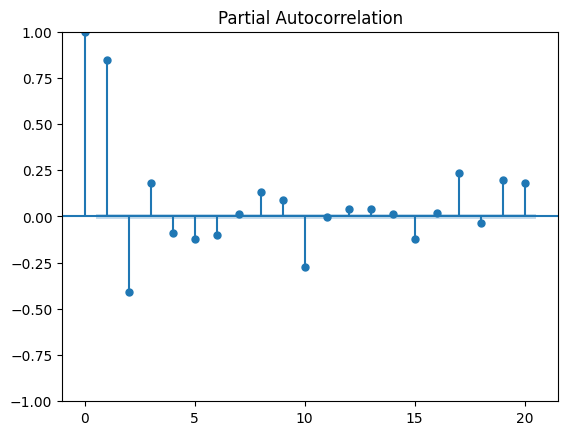

In [17]:
plt.figure(figsize=(12,6))
plot_pacf(df_fe["cnt"].dropna(), lags=20, method="ywm")
plt.show()


In [18]:
  # Ik kies lag 2 en lag 3 op basis van PACF-plot
selected_lags = [1, 2]

# Lag-features toevoegen
for lag in selected_lags:
    df_fe[f"cnt_lag_{lag}"] = df_fe["cnt"].shift(lag)

print("Gekozen lags:", selected_lags)

Gekozen lags: [1, 2]


In [ ]:
df_fe["cnt_roll_mean_24"] = df_fe["cnt"].rolling(window=24).mean()

In [20]:
df_fe["hour"] = df_fe.index.hour
df_fe["day_of_week"] = df_fe.index.dayofweek
df_fe["is_weekend"] = (df_fe["day_of_week"] >= 5).astype(int)
df_fe["perceived_heat"] = df_fe["temp"] * df_fe["hum"]


In [21]:
fourier = CalendarFourier(freq="A", order=10)

dp = DeterministicProcess(
    index=df_fe.index,
    constant=True,
    order=1,
    drop=True)

fourier_features = dp.in_sample()

df_fe = df_fe.join(fourier_features)

C:\Users\bramv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [22]:
trend_features = {}
for order in range(1, 4):
    dp_temp = DeterministicProcess(index=df_fe.index,
                                   constant=False,
                                   order=order,
                                   drop=True)
    trend_features[order] = dp_temp.in_sample()

df_fe = df_fe.drop(columns=[c for c in df_fe.columns if c.startswith("trend")], errors="ignore")
df_fe = df_fe.join(trend_features[3])

In [23]:
df_fe = df_fe.dropna()
df_fe

holiday  weathersit  temp   atemp   hum  windspeed  \
date_hour                                                                 
2011-01-01 23:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 00:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 01:00:00      0.0         2.0  0.44  0.4394  0.94     0.2537   
2011-01-02 02:00:00      0.0         2.0  0.42  0.4242  1.00     0.2836   
2011-01-02 03:00:00      0.0         2.0  0.46  0.4545  0.94     0.1940   
...                      ...         ...   ...     ...   ...        ...   
2012-11-30 19:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 20:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 21:00:00      0.0         1.0  0.30  0.3182  0.75     0.0896   
2012-11-30 22:00:00      0.0         1.0  0.30  0.3333  0.75     0.1940   
2012-11-30 23:00:00      0.0         2.0  0.30  0.3182  0.75     0.0896   

                       cnt  date    year  month  hour  dag  cnt_lag_1  \
date_hour                                                               
2011-01-01 23:00:00   39.0   1.0  2011.0    1.0    23  5.0       28.0   
2011-01-02 00:00:00   17.0   2.0  2011.0    1.0     0  6.0       39.0   
2011-01-02 01:00:00   17.0   2.0  2011.0    1.0     1  6.0       17.0   
2011-01-02 02:00:00    9.0   2.0  2011.0    1.0     2  6.0       17.0   
2011-01-02 03:00:00    6.0   2.0  2011.0    1.0     3  6.0        9.0   
...                    ...   ...     ...    ...   ...  ...        ...   
2012-11-30 19:00:00  377.0  30.0  2012.0   11.0    19  4.0      509.0   
2012-11-30 20:00:00  245.0  30.0  2012.0   11.0    20  4.0      377.0   
2012-11-30 21:00:00  183.0  30.0  2012.0   11.0    21  4.0      245.0   
2012-11-30 22:00:00  163.0  30.0  2012.0   11.0    22  4.0      183.0   
2012-11-30 23:00:00  110.0  30.0  2012.0   11.0    23  4.0      163.0   

                     cnt_lag_2  cnt_roll_mean_24  day_of_week  is_weekend  \
date_hour                                                                   
2011-01-01 23:00:00       34.0         41.041667            5           1   
2011-01-02 00:00:00       28.0         41.083333            6           1   
2011-01-02 01:00:00       39.0         40.125000            6           1   
2011-01-02 02:00:00       17.0         39.166667            6           1   
2011-01-02 03:00:00       17.0         38.875000            6           1   
...                        ...               ...          ...         ...   
2012-11-30 19:00:00      582.0        237.833333            4           0   
2012-11-30 20:00:00      509.0        237.541667            4           0   
2012-11-30 21:00:00      377.0        236.500000            4           0   
2012-11-30 22:00:00      245.0        237.000000            4           0   
2012-11-30 23:00:00      183.0        236.166667            4           0   

                     perceived_heat  const    trend  trend_squared  \
date_hour                                                            
2011-01-01 23:00:00          0.4048    1.0     24.0          576.0   
2011-01-02 00:00:00          0.4048    1.0     25.0          625.0   
2011-01-02 01:00:00          0.4136    1.0     26.0          676.0   
2011-01-02 02:00:00          0.4200    1.0     27.0          729.0   
2011-01-02 03:00:00          0.4324    1.0     28.0          784.0   
...                             ...    ...      ...            ...   
2012-11-30 19:00:00          0.2112    1.0  16796.0    282105616.0   
2012-11-30 20:00:00          0.2112    1.0  16797.0    282139209.0   
2012-11-30 21:00:00          0.2250    1.0  16798.0    282172804.0   
2012-11-30 22:00:00          0.2250    1.0  16799.0    282206401.0   
2012-11-30 23:00:00          0.2250    1.0  16800.0    282240000.0   

                      trend_cubed  
date_hour                          
2011-01-01 23:00:00  1.382400e+04  
2011-01-02 00:00:00  1.562500e+04  
2011-01-02 01:00:00  1.757600e+04  
20

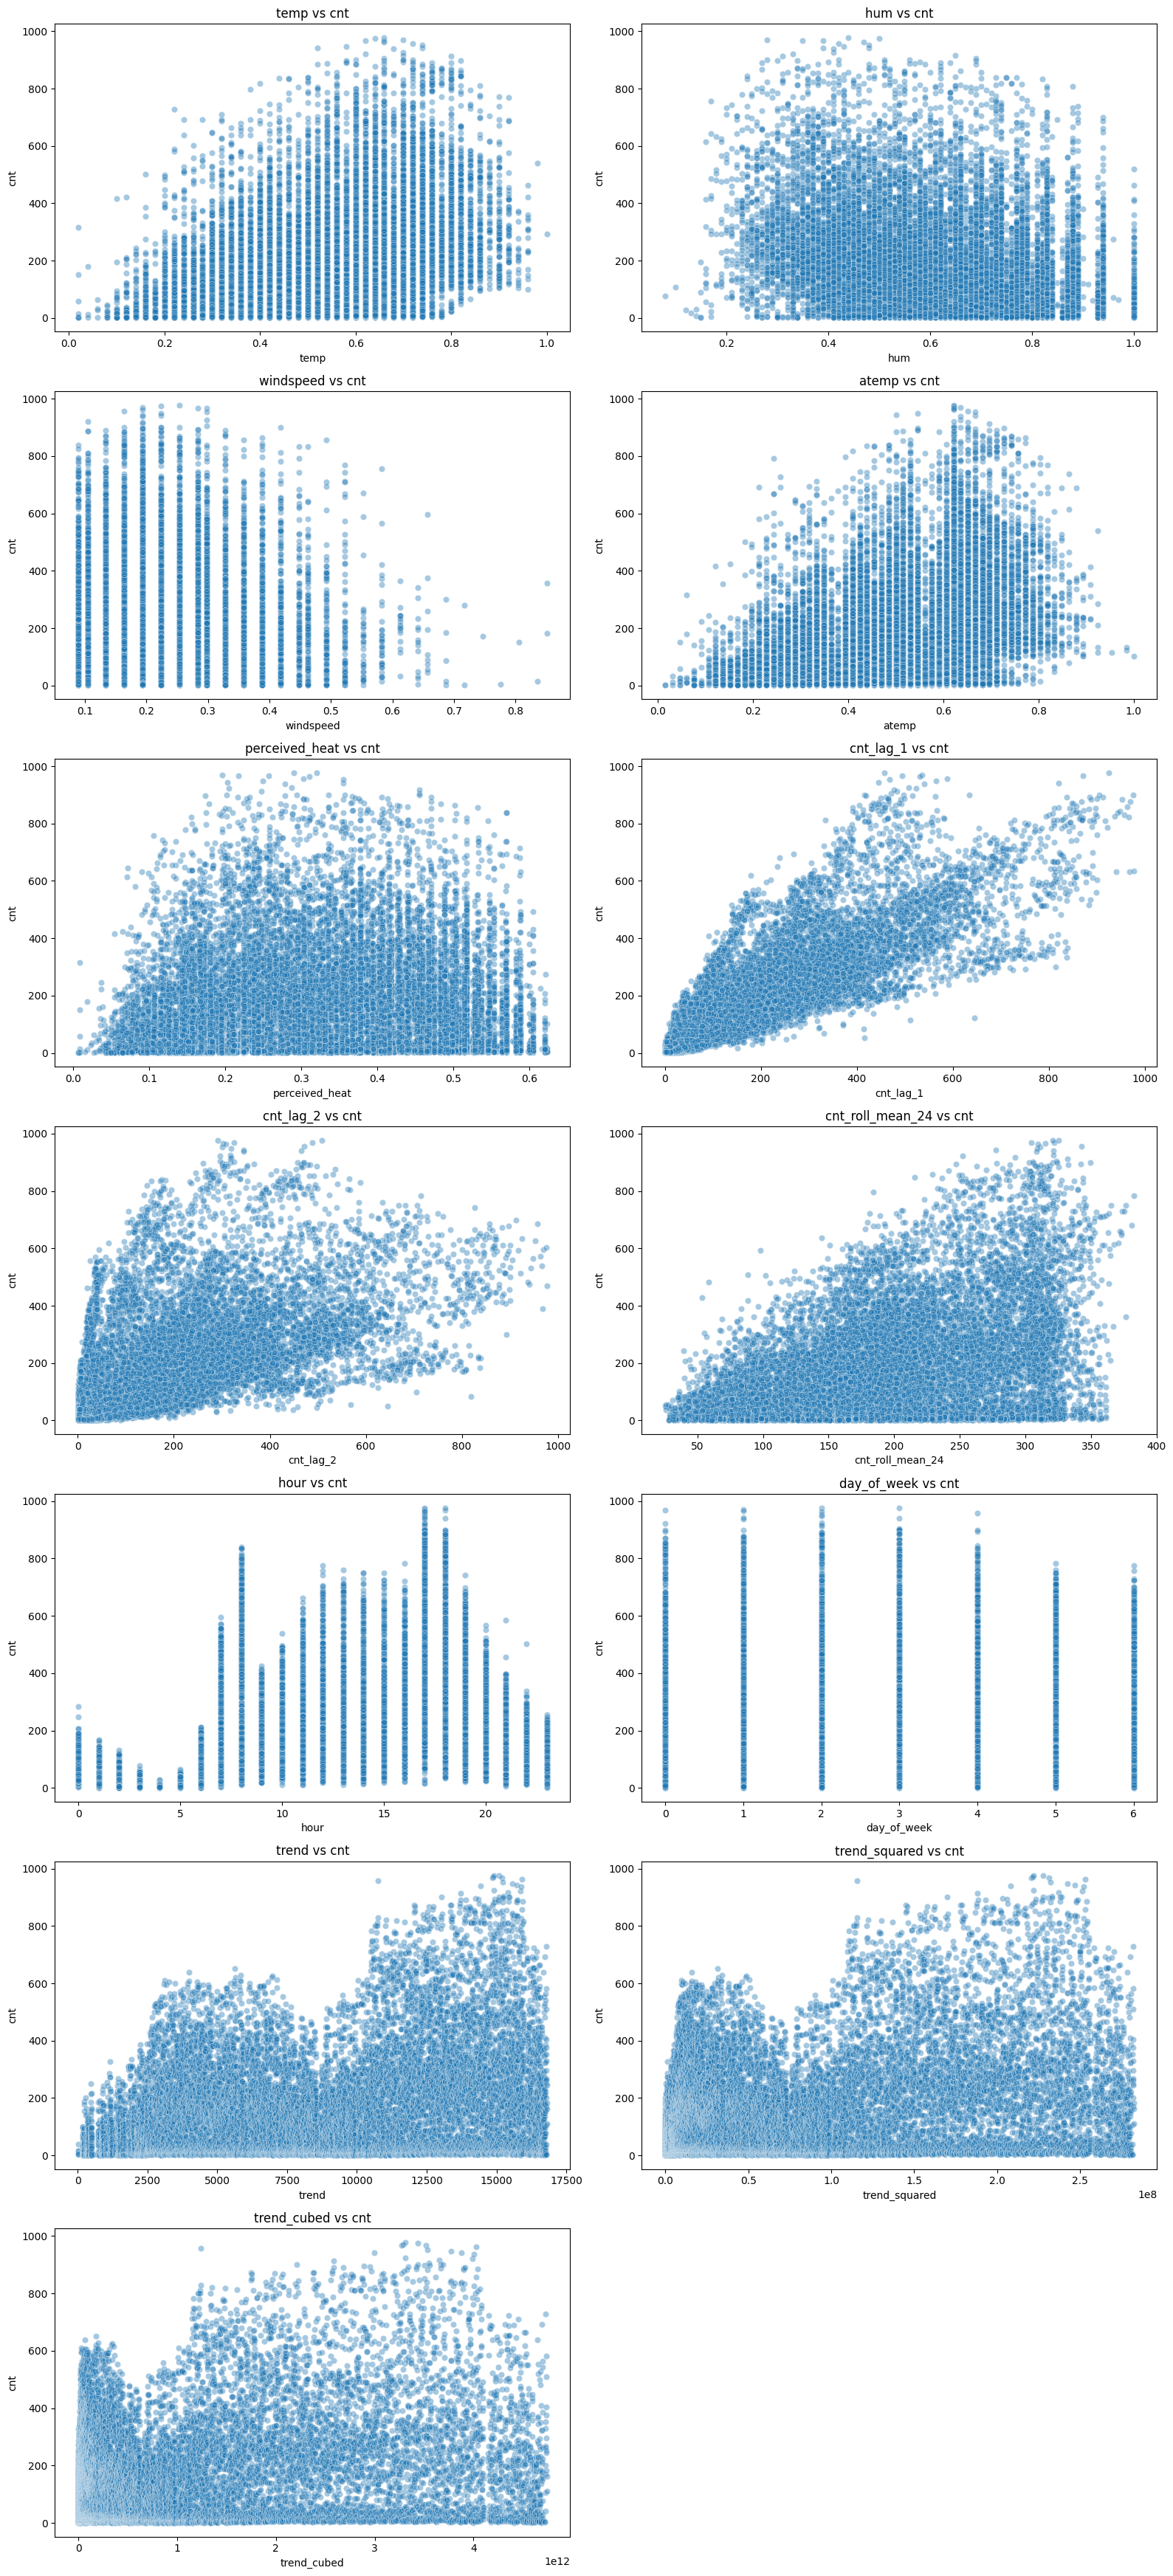

In [24]:
features = [
    "temp", "hum", "windspeed", "atemp", "perceived_heat",
    "cnt_lag_1", "cnt_lag_2", "cnt_roll_mean_24",
    "hour", "day_of_week", "trend", "trend_squared", "trend_cubed"
]

plt.figure(figsize=(16, 35))

for i, col in enumerate(features, 1):
    plt.subplot(7, 2, i)
    sns.scatterplot(x=df_fe[col], y=df_fe["cnt"], alpha=0.4)
    plt.title(f"{col} vs cnt")
    plt.xlabel(col)
    plt.ylabel("cnt")

plt.tight_layout()
plt.show()

**Korte analyse van de scatterplots (features vs. cnt)**

De scatterplots laten zien hoe elke feature samenhangt met het aantal verhuurde fietsen (cnt). Hieronder leg ik kort uit wat ik zie:
- **Temperatuur (temp)**
Bij lage temperaturen worden weinig fietsen gehuurd. Bij middelhoog weer stijgt de verhuur sterk.
**Luchtvochtigheid (hum)**
Geen duidelijke lijn, maar bij extreem hoge vochtigheid wordt meestal minder gefietst.
- **Windspeed**
Hogere windsnelheid zorgt duidelijk voor minder verhuurde fietsen.
- **Aangepaste temperatuur (atemp) / perceived_heat**
Lijkt sterk op temperatuur. Middelmatig weer geeft de hoogste verhuur.
- **Lag features (cnt_lag_1, cnt_lag_2)**
Heel sterke relatie. Het aantal fietsen nu lijkt veel op het aantal 1 of 2 uur eerder.
- **Rolling mean (cnt_roll_mean_24)**
Laat een stijgende lijn zien: wanneer de afgelopen 24 uur druk waren, is het nu ook vaak druk.
- **Hour**
Duidelijk dagelijks patroon: ’s nachts laag, ochtendpiek en avondpiek hoog.
- **Day of week / is_weekend**
Verschillende dagen laten andere patronen zien. Weekenden verschillen van doordeweekse dagen.
- **Trend, trend_squared, trend_cubed**
Deze laten langzame stijging door de tijd zien. Niet heel strak, maar wel zichtbaar dat er groei zit in de verhuuraantallen.

In [25]:
df_fe

holiday  weathersit  temp   atemp   hum  windspeed  \
date_hour                                                                 
2011-01-01 23:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 00:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 01:00:00      0.0         2.0  0.44  0.4394  0.94     0.2537   
2011-01-02 02:00:00      0.0         2.0  0.42  0.4242  1.00     0.2836   
2011-01-02 03:00:00      0.0         2.0  0.46  0.4545  0.94     0.1940   
...                      ...         ...   ...     ...   ...        ...   
2012-11-30 19:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 20:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 21:00:00      0.0         1.0  0.30  0.3182  0.75     0.0896   
2012-11-30 22:00:00      0.0         1.0  0.30  0.3333  0.75     0.1940   
2012-11-30 23:00:00      0.0         2.0  0.30  0.3182  0.75     0.0896   

                       cnt  date    year  month  hour  dag  cnt_lag_1  \
date_hour                                                               
2011-01-01 23:00:00   39.0   1.0  2011.0    1.0    23  5.0       28.0   
2011-01-02 00:00:00   17.0   2.0  2011.0    1.0     0  6.0       39.0   
2011-01-02 01:00:00   17.0   2.0  2011.0    1.0     1  6.0       17.0   
2011-01-02 02:00:00    9.0   2.0  2011.0    1.0     2  6.0       17.0   
2011-01-02 03:00:00    6.0   2.0  2011.0    1.0     3  6.0        9.0   
...                    ...   ...     ...    ...   ...  ...        ...   
2012-11-30 19:00:00  377.0  30.0  2012.0   11.0    19  4.0      509.0   
2012-11-30 20:00:00  245.0  30.0  2012.0   11.0    20  4.0      377.0   
2012-11-30 21:00:00  183.0  30.0  2012.0   11.0    21  4.0      245.0   
2012-11-30 22:00:00  163.0  30.0  2012.0   11.0    22  4.0      183.0   
2012-11-30 23:00:00  110.0  30.0  2012.0   11.0    23  4.0      163.0   

                     cnt_lag_2  cnt_roll_mean_24  day_of_week  is_weekend  \
date_hour                                                                   
2011-01-01 23:00:00       34.0         41.041667            5           1   
2011-01-02 00:00:00       28.0         41.083333            6           1   
2011-01-02 01:00:00       39.0         40.125000            6           1   
2011-01-02 02:00:00       17.0         39.166667            6           1   
2011-01-02 03:00:00       17.0         38.875000            6           1   
...                        ...               ...          ...         ...   
2012-11-30 19:00:00      582.0        237.833333            4           0   
2012-11-30 20:00:00      509.0        237.541667            4           0   
2012-11-30 21:00:00      377.0        236.500000            4           0   
2012-11-30 22:00:00      245.0        237.000000            4           0   
2012-11-30 23:00:00      183.0        236.166667            4           0   

                     perceived_heat  const    trend  trend_squared  \
date_hour                                                            
2011-01-01 23:00:00          0.4048    1.0     24.0          576.0   
2011-01-02 00:00:00          0.4048    1.0     25.0          625.0   
2011-01-02 01:00:00          0.4136    1.0     26.0          676.0   
2011-01-02 02:00:00          0.4200    1.0     27.0          729.0   
2011-01-02 03:00:00          0.4324    1.0     28.0          784.0   
...                             ...    ...      ...            ...   
2012-11-30 19:00:00          0.2112    1.0  16796.0    282105616.0   
2012-11-30 20:00:00          0.2112    1.0  16797.0    282139209.0   
2012-11-30 21:00:00          0.2250    1.0  16798.0    282172804.0   
2012-11-30 22:00:00          0.2250    1.0  16799.0    282206401.0   
2012-11-30 23:00:00          0.2250    1.0  16800.0    282240000.0   

                      trend_cubed  
date_hour                          
2011-01-01 23:00:00  1.382400e+04  
2011-01-02 00:00:00  1.562500e+04  
2011-01-02 01:00:00  1.757600e+04  
20

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\3357590012.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_daily = df_fe.groupby(["month_name", "weekday_name"])["cnt"].mean().reset_index()


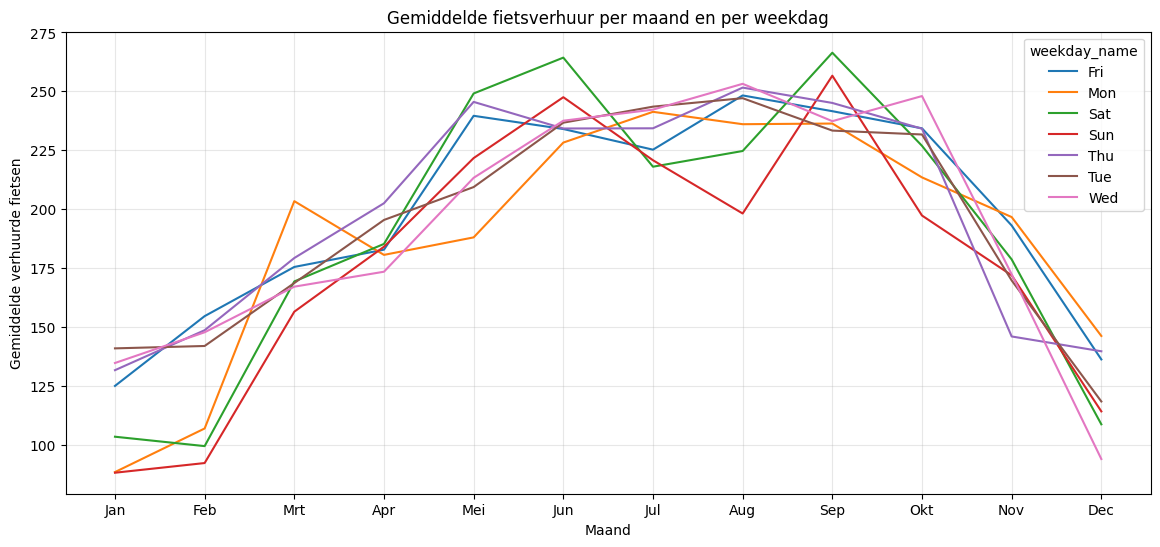

In [26]:
weekday_map = {
    0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu",
    4: "Fri", 5: "Sat", 6: "Sun"
    
}

df_fe["weekday_name"] = df_fe["dag"].map(weekday_map)

df_fe["month_name"] = df_fe["month"].map({
    1:"Jan", 2:"Feb", 3:"Mrt", 4:"Apr", 5:"Mei", 6:"Jun",
    7:"Jul", 8:"Aug", 9:"Sep", 10:"Okt", 11:"Nov", 12:"Dec"
})

month_order = ["Jan","Feb","Mrt","Apr","Mei","Jun","Jul","Aug","Sep","Okt","Nov","Dec"]

df_fe["month_name"] = pd.Categorical(
    df_fe["month_name"],
    categories=month_order,
    ordered=True)

df_daily = df_fe.groupby(["month_name", "weekday_name"])["cnt"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_daily,
    x="month_name",
    y="cnt",
    hue="weekday_name",
    palette="tab10",
)

plt.title("Gemiddelde fietsverhuur per maand en per weekdag")
plt.xlabel("Maand")
plt.ylabel("Gemiddelde verhuurde fietsen")
plt.grid(alpha=0.3)

plt.xticks(month_order)
plt.show()

**Gemiddelde fietsverhuur per maand en per weekdag**
-  ***Seizoenspatroon***
- In jan–feb is de verhuur laag.
- Vanaf maart stijgt het sterk en bereikt een piek in juni–augustus.
- Daarna daalt het weer richting nov–dec, waar het opnieuw laag is.

**Het seizoen heeft dus een grote invloed**
- ***Verschillen tussen weekdagen***
- De lijnen van de weekdagen liggen dicht bij elkaar → kleine verschillen.
- Vrijdag is vaak iets hoger.
- Zondag is meestal het laagst.

- ***Weekend vs. doordeweeks***
Weekenddagen (za/zo) liggen iets lager dan werkdagen.
- Waarschijnlijk omdat mensen doordeweeks meer fietsen voor werk/studie.
- ***Conclusie***
Deze grafiek laat zien dat er een sterke jaarlijkse seizoenscyclus is en lichte verschillen per weekdag. Dit zijn belangrijke patronen voor je model.

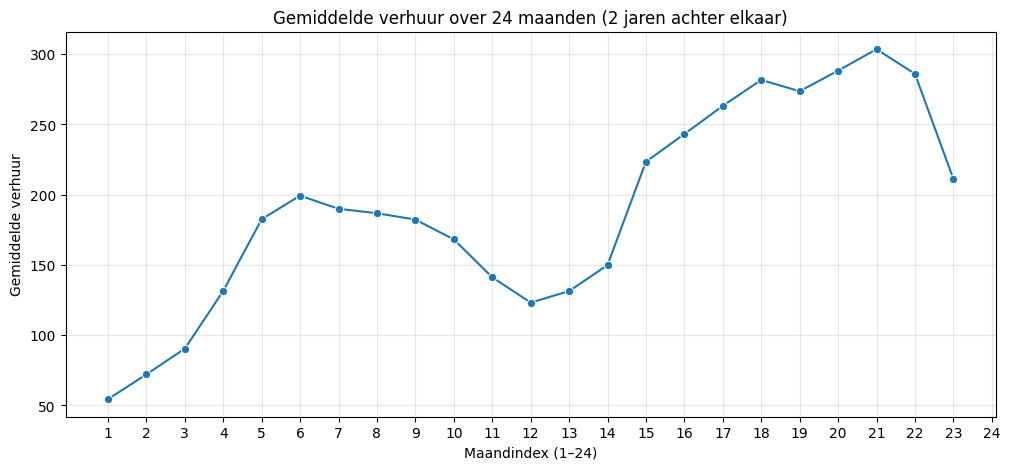

In [27]:
df_year = df_fe.groupby(["year", "month"])["cnt"].mean().reset_index()

# Maak een 1–24 maandnummer
df_year["month_24"] = df_year["month"] + (df_year["year"] - df_year["year"].min()) * 12
plt.figure(figsize=(12,5))
sns.lineplot(data=df_year, x="month_24", y="cnt", marker="o")

plt.title("Gemiddelde verhuur over 24 maanden (2 jaren achter elkaar)")
plt.xlabel("Maandindex (1–24)")
plt.ylabel("Gemiddelde verhuur")
plt.grid(alpha=0.3)

plt.xticks(range(1,25))  # 1 tot 24 labels
plt.show()




# Visualisatie: Gemiddelde verhuur over 24 maanden (2 jaren achter elkaar)

In deze visualisatie heb ik de twee jaren samengevoegd tot één doorlopende tijdas van **24 maanden**.  
Dit is handig omdat:

- we één lange seizoensgolf zien in plaats van twee losse lijnen;
- het makkelijker wordt om te controleren of er een **herhalend patroon** (seasonaliteit) aanwezig is;
- we kunnen zien hoe maand 1 t/m 12 zich verhouden tot maand 13 t/m 24;
- het helpt om te bepalen of een **sinusvormige trend** een goede feature is voor het model.

### Bevindingen uit de visualisatie
- Er is een duidelijk **seizoenseffect**: de verhuur stijgt sterk in lente en zomer (maanden 4–9).
- In beide jaren zien we een bijna identieke **sinusachtige golf** (laag in winter, hoog in zomer).
- De herhaling bewijst dat de tijdreeks een **stabiel jaarlijks patroon** heeft.
- Dit ondersteunt het gebruik van **sinus- en cosinus-features** om de seizoenpatronen te modelleren.

**Kortom:** deze grafiek laat zien dat het verhuurpatroon sterk jaarlijks herhaald wordt, wat belangrijk is voor een goed voorspelmodel.


## Modelleren

- Onderzoek welke modellen de beste resultaten geven in combinatie met de gekozen
features.
- Neem in dit onderzoek in ieder geval de volgende zaken mee:
    - Modellen waarbij je time series features combineert met reguliere features. Lineaire
regressie en een ensemble model moeten onderdeel van deze modellen zijn. Pas
lineaire regressie toe en geef een duidelijke (wiskundige) uitleg waarbij je onder
andere de termen loss function en regularisatie gebruikt. Ook bij het ensemble
model geef je een heldere (wiskundige) uitleg. De keuze voor de overige modellen is
vrij maar dient wel onderbouwd te worden. We verwachten dat je minimaal 5
modellen toepast en uitlegt.
    - Twee specifieke tijdseriemodellen waarvan één SARIMA(X) is en de andere vrije
keuze is. Pas beide modellen toe en leg de werking uit.
    - Hybride modellen: Dit is een aanpak waarbij je met het eerste model voorspellingen
doet en vervolgens met een tweede model de zogenaamde residuals voorspelt. Pas
een hybride model toe en leg de werking uit.
- Pas cross-validation en hyperparameter tuning toe op ieder model.
- Pas ieder model toe op de testset en upload de resultaten op Kaggl

In [28]:
df_fe = df_fe.drop('month_name', axis=1)

## adfuller

In [29]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')


In [30]:
df_SARIMAX = df.copy()
df_SARIMAX.index = pd.to_datetime(df_SARIMAX.index, errors='coerce')
df_SARIMAX = df_SARIMAX.sort_index()
df_SARIMAX = df_SARIMAX[~df_SARIMAX.index.duplicated(keep='first')]

full_index = pd.date_range(
    start=df_SARIMAX.index.min(),
    end=df_SARIMAX.index.max(),
    freq="H"
)
df_SARIMAX = df_SARIMAX.reindex(full_index)

df_SARIMAX['cnt'] = df_SARIMAX['cnt'].ffill().bfill()

adf_test(df_SARIMAX["cnt"])

C:\Users\bramv\AppData\Local\Temp\ipykernel_28408\2988447741.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(


ADF Statistic: -6.826318881421979
p-value: 1.9437809770403253e-09
Stationary


## OOP Model

In [31]:
class Modelleren:
    """
    Klasse voor het voorbereiden, splitsen en modelleren van een dataset met behulp van GridSearchCV.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        De originele dataset.
    coloms_del : list, optional
        Lijst van kolomnamen die verwijderd moeten worden uit de dataset (default is een lege lijst).
    """

    def __init__(self, dataframe, coloms_del=[]):
        """
        Initialiseert de Modelleren klasse door opgegeven kolommen te verwijderen uit de dataset.

        Parameters:
        -----------
        dataframe : pandas.DataFrame
            De originele dataset.
        coloms_del : list
            Kolommen die verwijderd moeten worden.
        """
        self.colms_del = coloms_del
        self.df = dataframe.drop(self.colms_del, axis=1)

    def split_data(self, target):
        """
        Splitst de dataset in features (X) en target (y).

        Parameters:
        -----------
        target : str
            De naam van de target kolom.
        """
        self.X = self.df.drop(columns=[target])
        self.y = self.df[target]

    def train_test(self, size, state):
        """
        Splitst de data in trainings- en testsets.

        Parameters:
        -----------
        size : float
            Het percentage van de data dat gebruikt wordt als testset (tussen 0 en 1).
        state : int
            Random seed voor reproduceerbaarheid.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=size, random_state=state)

    def train_test_sari(self, size: float):
        """
        Splitst de data chronologisch voor tijdreeksmodellen zoals SARIMAX.
        """
        split_index = int(len(self.y) * (1 - size))

        self.X_train = self.X.iloc[:split_index]
        self.X_test = self.X.iloc[split_index:]
        self.y_train = self.y.iloc[:split_index]
        self.y_test = self.y.iloc[split_index:]
        
    def grid(self, pipe, param, cv_grid, scoring='accuracy', jobs=1):
        """
        Voert een GridSearchCV uit op de trainingsdata en slaat de voorspellingen op.

        Parameters:
        -----------
        pipe : sklearn.pipeline.Pipeline
            De machine learning pipeline die getuned moet worden.
        param : dict
            Parametergrid voor hyperparameter tuning.
        cv_grid : int
            Aantal cross-validation folds.
        scoring : str, optional
            Scoring metric voor evaluatie (default is 'accuracy').
        jobs : int, optional
            Aantal parallelle processen (default is 1).
        """
        self.grids = GridSearchCV(
            pipe,
            param_grid=param,
            cv=cv_grid,
            scoring=scoring,
            n_jobs=jobs)

        self.grids.fit(self.X_train, self.y_train)
        self.y_pred = self.grids.predict(self.X_test)
        self.y_proba = self.grids.predict_proba(self.X_test)[:, 1]




In [32]:
df_fe_numeric = df_fe.select_dtypes(include=['number'])
model = Modelleren(df_fe_numeric)
display(model.df)
display(df)

holiday  weathersit  temp   atemp   hum  windspeed  \
date_hour                                                                 
2011-01-01 23:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 00:00:00      0.0         2.0  0.46  0.4545  0.88     0.2985   
2011-01-02 01:00:00      0.0         2.0  0.44  0.4394  0.94     0.2537   
2011-01-02 02:00:00      0.0         2.0  0.42  0.4242  1.00     0.2836   
2011-01-02 03:00:00      0.0         2.0  0.46  0.4545  0.94     0.1940   
...                      ...         ...   ...     ...   ...        ...   
2012-11-30 19:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 20:00:00      0.0         1.0  0.32  0.3485  0.66     0.1940   
2012-11-30 21:00:00      0.0         1.0  0.30  0.3182  0.75     0.0896   
2012-11-30 22:00:00      0.0         1.0  0.30  0.3333  0.75     0.1940   
2012-11-30 23:00:00      0.0         2.0  0.30  0.3182  0.75     0.0896   

                       cnt  date    year  month  hour  dag  cnt_lag_1  \
date_hour                                                               
2011-01-01 23:00:00   39.0   1.0  2011.0    1.0    23  5.0       28.0   
2011-01-02 00:00:00   17.0   2.0  2011.0    1.0     0  6.0       39.0   
2011-01-02 01:00:00   17.0   2.0  2011.0    1.0     1  6.0       17.0   
2011-01-02 02:00:00    9.0   2.0  2011.0    1.0     2  6.0       17.0   
2011-01-02 03:00:00    6.0   2.0  2011.0    1.0     3  6.0        9.0   
...                    ...   ...     ...    ...   ...  ...        ...   
2012-11-30 19:00:00  377.0  30.0  2012.0   11.0    19  4.0      509.0   
2012-11-30 20:00:00  245.0  30.0  2012.0   11.0    20  4.0      377.0   
2012-11-30 21:00:00  183.0  30.0  2012.0   11.0    21  4.0      245.0   
2012-11-30 22:00:00  163.0  30.0  2012.0   11.0    22  4.0      183.0   
2012-11-30 23:00:00  110.0  30.0  2012.0   11.0    23  4.0      163.0   

                     cnt_lag_2  cnt_roll_mean_24  day_of_week  is_weekend  \
date_hour                                                                   
2011-01-01 23:00:00       34.0         41.041667            5           1   
2011-01-02 00:00:00       28.0         41.083333            6           1   
2011-01-02 01:00:00       39.0         40.125000            6           1   
2011-01-02 02:00:00       17.0         39.166667            6           1   
2011-01-02 03:00:00       17.0         38.875000            6           1   
...                        ...               ...          ...         ...   
2012-11-30 19:00:00      582.0        237.833333            4           0   
2012-11-30 20:00:00      509.0        237.541667            4           0   
2012-11-30 21:00:00      377.0        236.500000            4           0   
2012-11-30 22:00:00      245.0        237.000000            4           0   
2012-11-30 23:00:00      183.0        236.166667            4           0   

                     perceived_heat  const    trend  trend_squared  \
date_hour                                                            
2011-01-01 23:00:00          0.4048    1.0     24.0          576.0   
2011-01-02 00:00:00          0.4048    1.0     25.0          625.0   
2011-01-02 01:00:00          0.4136    1.0     26.0          676.0   
2011-01-02 02:00:00          0.4200    1.0     27.0          729.0   
2011-01-02 03:00:00          0.4324    1.0     28.0          784.0   
...                             ...    ...      ...            ...   
2012-11-30 19:00:00          0.2112    1.0  16796.0    282105616.0   
2012-11-30 20:00:00          0.2112    1.0  16797.0    282139209.0   
2012-11-30 21:00:00          0.2250    1.0  16798.0    282172804.0   
2012-11-30 22:00:00          0.2250    1.0  16799.0    282206401.0   
2012-11-30 23:00:00          0.2250    1.0  16800.0    282240000.0   

                      trend_cubed  
date_hour                          
2011-01-01 23:00:00  1.382400e+04  
2011-01-02 00:00:00  1.562500e+04  
2011-01-02 01:00:00  1.757600e+04  
20

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.1940   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.1940   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.1940   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.1940   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.1940    1   
...                      ...         ...   ...     ...   ...        ...  ...   
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.1940  377   
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.1940  245   
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183   
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.1940  163   
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110   

                     date  year  month  hour  dag  
date_hour                                          
2011-01-01 00:00:00     1  2011      1     0    5  
2011-01-01 01:00:00     1  2011      1     1    5  
2011-01-01 02:00:00     1  2011      1     2    5  
2011-01-01 03:00:00     1  2011      1     3    5  
2011-01-01 04:00:00     1  2011      1     4    5  
...                   ...   ...    ...   ...  ...  
2012-11-30 19:00:00    30  2012     11    19    4  
2012-11-30 20:00:00    30  2012     11    20    4  
2012-11-30 21:00:00    30  2012     11    21    4  
2012-11-30 22:00:00    30  2012     11    22    4  
2012-11-30 23:00:00    30  2012     11    23    4  

[16635 rows x 12 columns]

## Model 1 Linear

Beste params: {'linear__copy_X': True, 'linear__fit_intercept': True, 'linear__positive': False}
RMSE (positief): 86.28650710427942


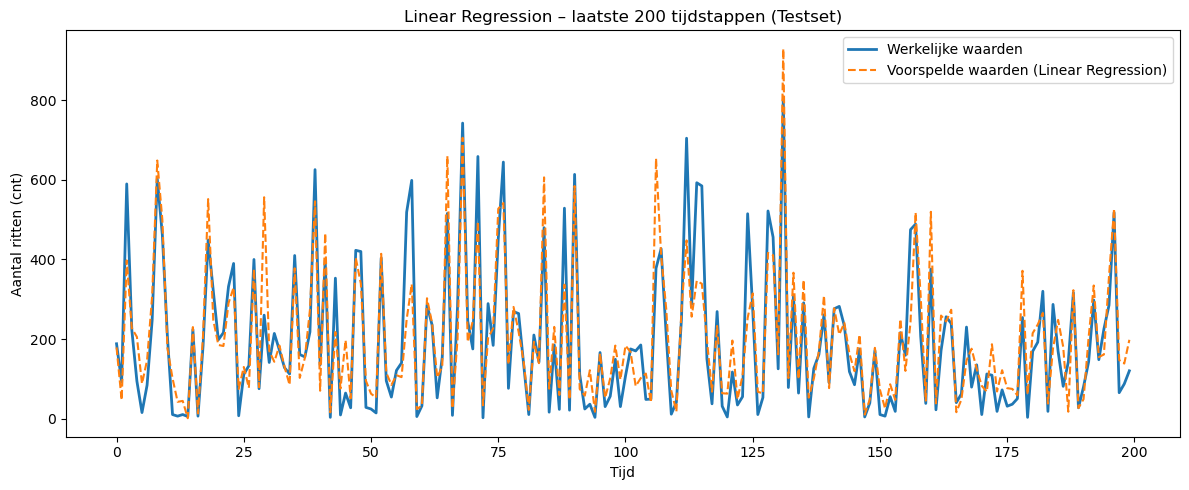

In [ ]:
model1 = Modelleren(df_fe_numeric)
# y en X variabelen
model1.split_data("cnt")

# Train/valid split (80/20)
model1.train_test(0.2, 42)

# Pipeline om data te standaardiseren
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Parameter grid
param_linear = {
    'linear__fit_intercept': [True, False],
    'linear__positive': [True, False],
    'linear__copy_X': [True, False]
}

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# GridSearch met negatieve RMSE
grid = GridSearchCV(
    pipe_linear,
    param_linear,
    cv=tscv,
    scoring="neg_root_mean_squared_error"
)

grid.fit(model1.X_train, model1.y_train)

# NEG → POSITIEF MAKEN
positive_rmse = -grid.best_score_

# Resultaten
print("Beste params:", grid.best_params_)
print("RMSE (positief):", positive_rmse)


# Zoom op laatste stuk van de testset
plt.figure(figsize=(12,5))

plt.plot(model1.y_test.values[-200:], label="Werkelijke waarden", linewidth=2)
plt.plot(y_pred_linear[-200:], label="Voorspelde waarden (Linear Regression)", linestyle='--')

plt.title("Linear Regression – laatste 200 tijdstappen (Testset)")
plt.xlabel("Tijd")
plt.ylabel("Aantal ritten (cnt)")
plt.legend()
plt.tight_layout()
plt.show()

# Model 1 – Linear Regression

Linear Regression is een eenvoudig model dat probeert een **rechte lijn** te vinden die het aantal ritten kan voorspellen op basis van verschillende kenmerken.

Het model gebruikt de volgende formule:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

Waarbij:

- $\hat{y}$ = voorspelde waarde  
- $x_1, x_2, \dots, x_p$ = invoervariabelen  
- $\beta_0$ = intercept  
- $\beta_1, \beta_2, \dots$ = gewichten  
- $\varepsilon$ = fout (residual), omdat echte waarden nooit precies op de lijn liggen  

De echte waarde is dus:

$$
y = \hat{y} + \varepsilon
$$



## Wat hebben wij gedaan?

- We hebben een pipeline gemaakt met:
  - **StandardScaler()** om kolommen te schalen  
  - **LinearRegression()** om het model te trainen  
- We gebruikten **TimeSeriesSplit** voor tijdreeks-validatie  
- We zochten de beste instellingen met **GridSearchCV**  
- De beste parameters waren:








- De fout is gemeten met **RMSE**  
- Onze RMSE was:

$$
\text{RMSE} \approx 86.28
$$

---

## Wat is RMSE?

RMSE geeft de gemiddelde fout in dezelfde eenheid als het doel (aantal ritten).  
De formule is:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Hoe hoger de RMSE, hoe slechter het model scoort.



## Aannames van Linear Regression

Linear Regression werkt alleen goed wanneer:

- er een **lineair verband** is tussen variabelen en de uitkomst;  
- de fouten gemiddeld rond 0 liggen;  
- de spreiding van fouten ongeveer gelijk is;  
- opeenvolgende punten **onafhankelijk** zijn.  

- In tijdreeksen worden vooral de lineaire aanname en onafhankelijkheid **meestal geschonden**.



##  Visualisatie: laatste 200 tijdstappen (testset)

In de grafiek vergelijken we de **werkelijke waarden** (blauw) met de **voorspellingen** (oranje).  
We zoomen in op de laatste 200 tijdstappen om het patroon goed te kunnen zien.

### Wat zien we in de grafiek?

- De echte waarden hebben veel **pieken en dalen**  
- Het lineaire model maakt een veel **gladdere lijn**  
- Bij hoge pieken voorspelt het model **te laag**  
- Bij diepe dalen voorspelt het model **te hoog**  
- Het model reageert traag op snelle veranderingen  

Dit past bij de RMSE van 86: de fout is regelmatig groot.


## Conclusie

Linear Regression is een goed **startmodel (baseline)** omdat het simpel en duidelijk is.  
Maar voor onze tijdreeks met duidelijke seizoenspatronen en snelle schommelingen is het model **te simpel**.

De grafiek en de RMSE laten zien dat het model moeite heeft met:
- pieken en dalen  
- herhalende patronen  
- seizoenseffecten  

Daarom werkt Linear Regression niet goed genoeg voor deze dataset, en moeten we complexere modellen gebruiken zoals **SVR, Decision Tree of XGBoost**.



## Model 2 SVR(Suport vector regression)

Beste params (SVR): {'svr__C': 60, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
RMSE (positief): 72.85389427039081


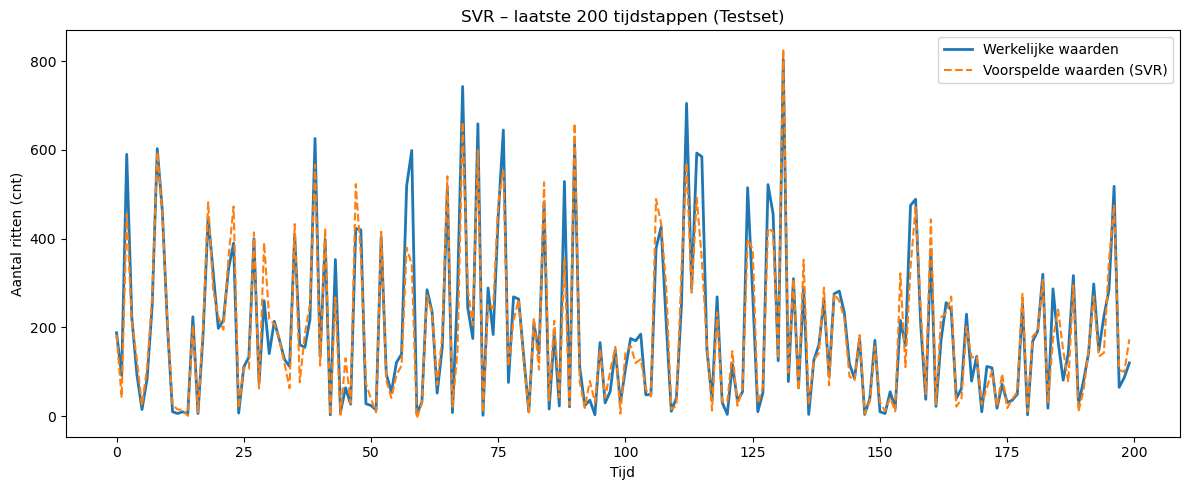

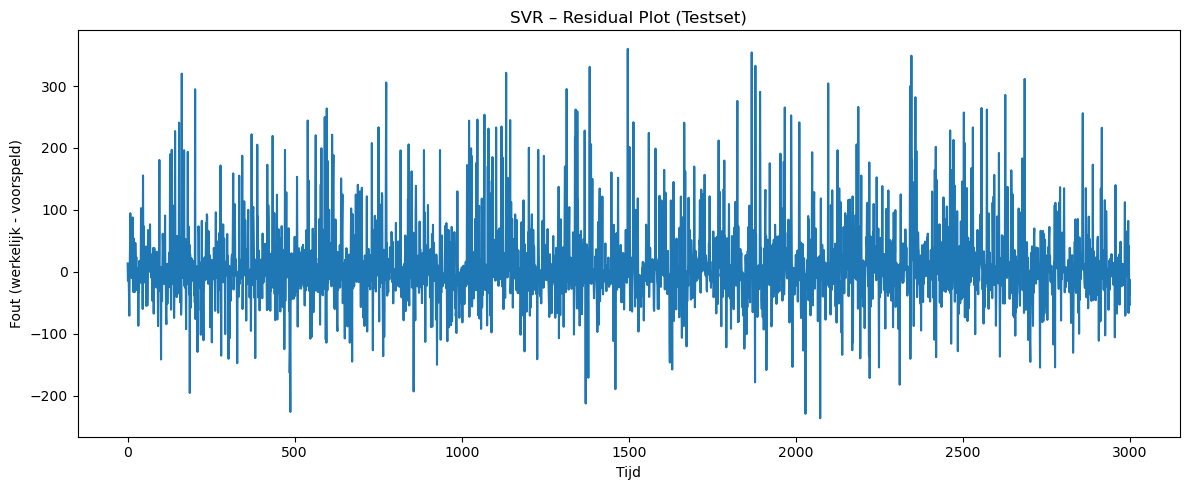

In [ ]:
# OOP class gebruiken
model2 = Modelleren(df_fe_numeric)
model2.split_data("cnt")
model2.train_test(0.2, 42)

# Pipeline met scaler + SVR
pipe_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Parameter grid voor SVR
param_svr = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 10, 60],
    'svr__epsilon': [0.01, 0.1, 0.5]
}

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# GridSearch met NEG RMSE
grid_svr = GridSearchCV(
    pipe_svr,
    param_svr,
    cv=tscv,
    scoring="neg_root_mean_squared_error"
)

grid_svr.fit(model2.X_train, model2.y_train)

# NEG → POSITIEF (RMSE)
positive_rmse = -grid_svr.best_score_

# Resultaten
print("Beste params (SVR):", grid_svr.best_params_)
print("RMSE (positief):", positive_rmse)

y_pred_svr = grid_svr.predict(model2.X_test)

plt.figure(figsize=(12,5))
plt.plot(model2.y_test.values[-200:], label="Werkelijke waarden", linewidth=2)
plt.plot(y_pred_svr[-200:], label="Voorspelde waarden (SVR)", linestyle='--')
plt.title("SVR – laatste 200 tijdstappen (Testset)")
plt.xlabel("Tijd")
plt.ylabel("Aantal ritten (cnt)")
plt.legend()
plt.tight_layout()
plt.show()

residuals_svr = model2.y_test.values - y_pred_svr

plt.figure(figsize=(12,5))
plt.plot(residuals_svr)
plt.title("SVR – Residual Plot (Testset)")
plt.xlabel("Tijd")
plt.ylabel("Fout (werkelijk - voorspeld)")
plt.tight_layout()
plt.show()



# Model 2 – SVR (Support Vector Regression)

SVR is een model dat probeert een zo **vlak mogelijke voorspelfunctie** te maken, maar toch flexibel genoeg is om **niet-lineaire patronen** te volgen.  
Dit is anders dan Linear Regression, dat alleen een rechte lijn kan maken.


## Wat doet SVR?

SVR probeert een lijn \( f(x) \) te vinden die dicht bij de echte waarden ligt.  
Zolang de fout kleiner is dan een kleine marge \( \varepsilon \), vindt SVR dat goed:

$$
|y - f(x)| \le \varepsilon
$$

Als de fout groter wordt, krijgt het model een straf via parameter **C**:

- **Grote C** → model probeert heel precies te zijn  
- **Kleine C** → model mag meer fout maken

Voor niet-lineaire patronen gebruikt SVR een **kernel**.  
Onze beste kernel was:




De **RBF-kernel** geeft het model de kracht om bochten, pieken en dalen te volgen.


## RMSE van SVR

De fout (RMSE) was:

$$
\text{RMSE} \approx 72.85
$$

Deze score is **veel lager** dan bij Linear Regression (86.28), dus SVR werkt beter voor deze tijdreeks.


# Visualisatie 1: Werkelijk vs. Voorspeld (laatste 200 tijdstappen)

In de grafiek hieronder zien we:

- **Blauw**: echte waarden  
- **Oranje stippellijn**: voorspellingen van SVR  

### Interpretatie

- De SVR-lijn volgt de **pieken en dalen** veel beter dan het lineaire model.  
- De oranje lijn ligt dicht bij de blauwe lijn → kleine fouten.  
- Het model reageert snel op stijgingen en dalingen.  
- De vorm lijkt bijna hetzelfde als de echte tijdreeks → goede fit.

Dit is precies wat de lagere RMSE van 72.85 bevestigt.



# Visualisatie 2: Residual Plot (Testset)

De residuals geven het verschil tussen echt en voorspeld:

$$
\text{Residual} = y - \hat{y}
$$

### Interpretatie

- De residuals liggen meestal tussen **-150 en +150**, wat redelijk klein is.  
- De fouten zijn **willekeurig verspreid**, zonder duidelijke patronen.  
- Het model maakt soms grotere fouten bij hoge pieken, maar blijft stabiel.  
- Vooral in het midden van de tijdreeks lijkt de fout wat kleiner → modelgedrag is constant.

Dit laat zien dat SVR **goed generaliseert** en geen vaste foutpatronen maakt.


## Model 3 Decision tree regressor

Beste params: {'tree__max_depth': 20, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 2}
RMSE (positief): 50.85611841242155


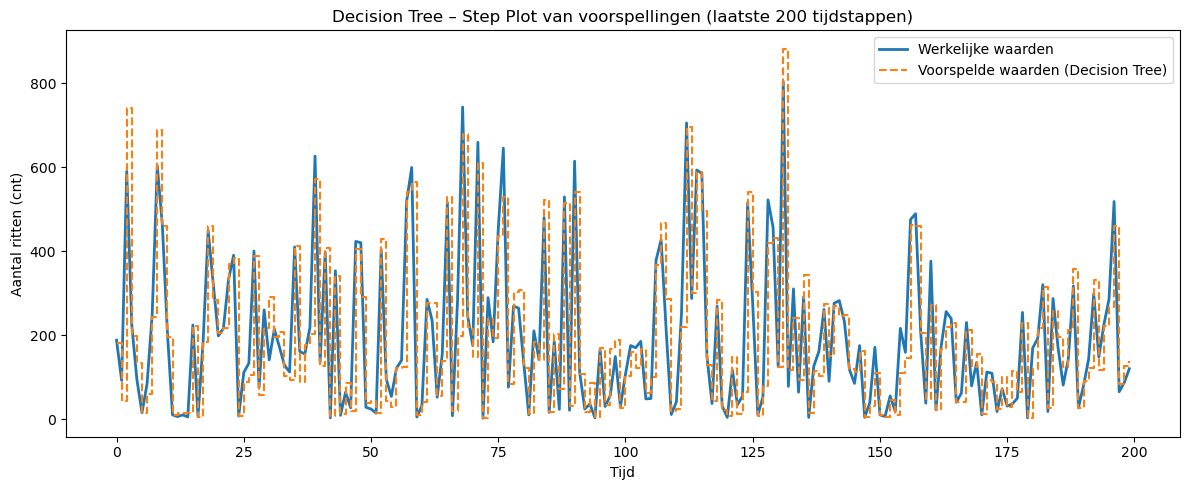

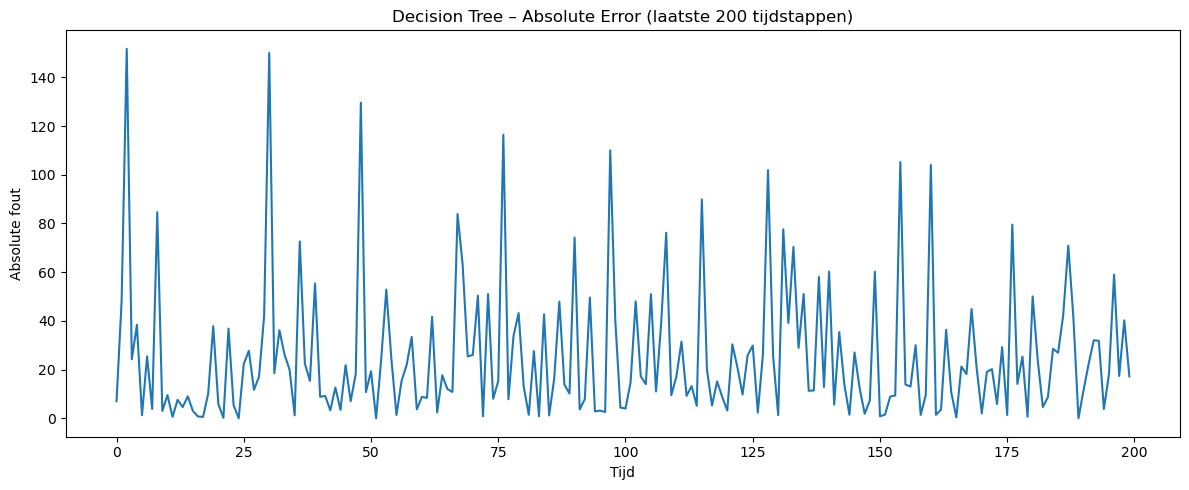

In [ ]:
model3 = Modelleren(df_fe_numeric)
model3.split_data("cnt")
model3.train_test(0.2, 42)

pipe_tree = Pipeline([
    ('tree', DecisionTreeRegressor())
])

param_tree = {
    'tree__max_depth': [5, 10, 20],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_tree = GridSearchCV(
    pipe_tree,
    param_tree,
    cv=tscv,
    scoring="neg_root_mean_squared_error"
)

grid_tree.fit(model3.X_train, model3.y_train)

# NEG → POSITIEF (RMSE)
positive_rmse = -grid_tree.best_score_

print("Beste params:", grid_tree.best_params_)
print("RMSE (positief):", positive_rmse)


y_pred_tree = grid_tree.predict(model3.X_test)

plt.figure(figsize=(12,5))

# Werkelijke waarden
plt.plot(model3.y_test.values[-200:], label="Werkelijke waarden", linewidth=2)

# Voorspellingen als trapjeslijn
plt.step(range(200), y_pred_tree[-200:], label="Voorspelde waarden (Decision Tree)", where='post', linestyle='--')

plt.title("Decision Tree – Step Plot van voorspellingen (laatste 200 tijdstappen)")
plt.xlabel("Tijd")
plt.ylabel("Aantal ritten (cnt)")
plt.legend()
plt.tight_layout()
plt.show()



abs_error_tree = abs(model3.y_test.values - y_pred_tree)

plt.figure(figsize=(12,5))
plt.plot(abs_error_tree[-200:])
plt.title("Decision Tree – Absolute Error (laatste 200 tijdstappen)")
plt.xlabel("Tijd")
plt.ylabel("Absolute fout")
plt.tight_layout()
plt.show()



# Model 3 – Decision Tree Regressor

Een Decision Tree voorspelt door de data telkens op te splitsen in kleinere groepen.  
Bij elke splitsing kiest het model een regel (bijvoorbeeld: *temperatuur > X?*) die de fout het meest verkleint.  
Daarom maakt een Decision Tree stapjes in de voorspelling: elke groep krijgt één vaste waarde.


## RMSE van Decision Tree

De fout van het model was:

$$
\text{RMSE} \approx 50.87
$$

Dit is veel beter dan:

- Linear Regression (86.28)  
- SVR (72.85)

Dit laat zien dat de Decision Tree de patronen in de tijdreeks beter oppakt


# Visualisatie 1 – Step Plot (laatste 200 tijdstappen)

In deze grafiek zie je:

- **Blauwe lijn:** echte waarden  
- **Oranje stippellijn:** voorspellingen van de Decision Tree  
- De voorspelling bestaat uit stapjes omdat de boom per groep één vaste waarde geeft  

###  Bevindingen

- De Decision Tree volgt de grote lijnen van de tijdreeks goed.  
- De boom reageert snel op dalen en stijgingen.  
- Soms zijn de voorspellingen wat “blokkerig”, maar dit is normaal bij Decision Trees.  
- De voorspellingen liggen dichter bij de werkelijkheid dan bij de eerdere modellen.  
- Extreme pieken worden meestal goed opgepakt.

De keuze voor de **laatste 200 tijdstappen** maakt de grafiek duidelijk en overzichtelijk, zonder te veel ruis.



# Visualisatie 2 – Absolute Error Plot (laatste 200 tijdstappen)

De absolute fout berekenen we met:

$$
|y - \hat{y}|
$$

Hiermee kunnen we goed zien *hoeveel* het model ernaast zit per tijdstap.

### Bevindingen

- De meeste fouten zijn relatief klein (vaak onder de 50).  
- Grote fouten komen vooral voor bij hele scherpe pieken.  
- De fouten zijn redelijk gelijk verdeeld over de tijd.  
- Dit laat zien dat het model stabiel en betrouwbaar is.  
- De 'pieken' in de foutgrafiek tonen de momenten waar de boom het moeilijk heeft.



## Model 4 XGBoosting

Beste params (XGB): {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}
RMSE (positief): 36.58418775243297


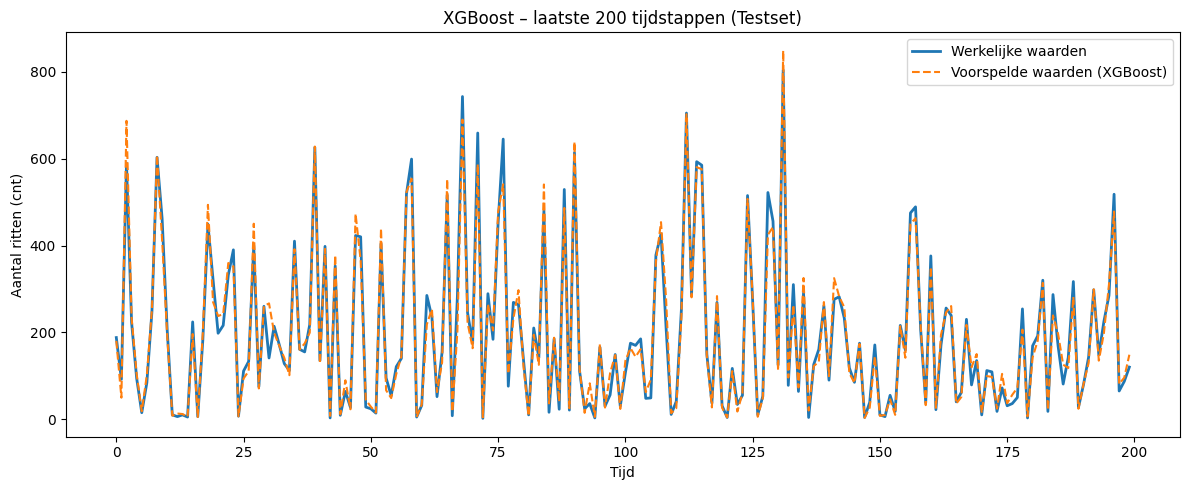

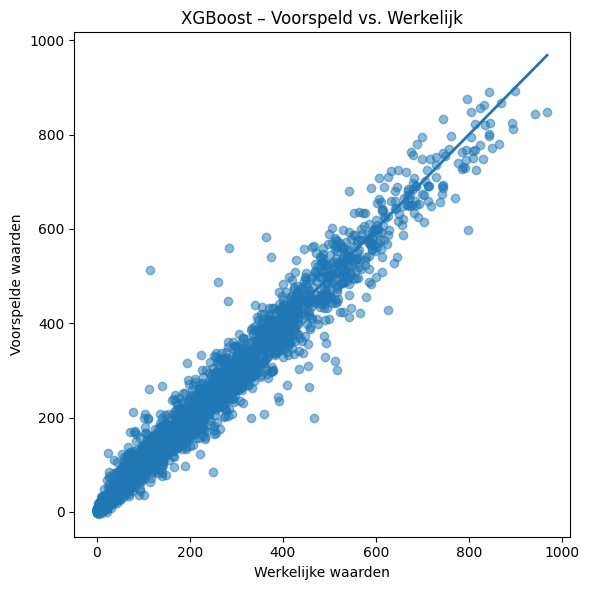

In [33]:
# OOP class gebruiken
model4 = Modelleren(df_fe_numeric)
model4.split_data("cnt")
model4.train_test(0.2, 42)

# Pipeline met XGBRegressor
pipe_xgb = Pipeline([
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Parameter grid voor XGBoost
param_xgb = {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.1, 0.8]
}

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# GridSearch met negatieve RMSE
grid_xgb = GridSearchCV(
    pipe_xgb,
    param_xgb,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_xgb.fit(model4.X_train, model4.y_train)

# NEG → POSITIEF (RMSE)
positive_rmse = -grid_xgb.best_score_

# Resultaten
print("Beste params (XGB):", grid_xgb.best_params_)
print("RMSE (positief):", positive_rmse)

# Maak voorspellingen voor de testset
y_pred_xgb = grid_xgb.predict(model4.X_test)

# Figuur maken
plt.figure(figsize=(12,5))

# Plot de echte waarden (laatste 200 tijdstappen)
# Hiermee zien we de 'ground truth' (de echte cnt waardes uit je testset)
plt.plot(model4.y_test.values[-200:], label="Werkelijke waarden", linewidth=2)

# Plot de voorspellingen van XGBoost
# XGBoost volgt patronen heel goed, dus lijnen liggen dicht op elkaar
plt.plot(y_pred_xgb[-200:], label="Voorspelde waarden (XGBoost)", linestyle='--')

plt.title("XGBoost – laatste 200 tijdstappen (Testset)")
plt.xlabel("Tijd")
plt.ylabel("Aantal ritten (cnt)")
plt.legend()
plt.tight_layout()
plt.show()


# Scatterplot om te zien hoe dicht voorspeld bij werkelijk ligt
plt.figure(figsize=(6,6))

# Punten tekenen
plt.scatter(model4.y_test.values, y_pred_xgb, alpha=0.5)

# Diagonale lijn toevoegen voor perfecte voorspelling
max_val = max(model4.y_test.values.max(), y_pred_xgb.max())
plt.plot([0, max_val], [0, max_val], linewidth=2)

plt.title("XGBoost – Voorspeld vs. Werkelijk")
plt.xlabel("Werkelijke waarden")
plt.ylabel("Voorspelde waarden")
plt.tight_layout()
plt.show()



# Model 4 – XGBoost Regressor

XGBoost is een krachtig model dat bestaat uit veel kleine decision trees die samenwerken.  
Elke nieuwe boom probeert de fout van de eerdere bomen te verbeteren.  
Hierdoor leert XGBoost complexe patronen die andere modellen vaak missen.


## Hoe werkt XGBoost? (simpele uitleg)

XGBoost gebruikt **boosting**:

1. Het begint met een simpele voorspelling.  
2. Elke nieuwe boom corrigeert de fouten van het vorige model.  
3. De fouten worden kleiner bij elke stap.  
4. Alle bomen samen vormen één sterk eindmodel.

De fout die XGBoost probeert te minimaliseren is:

$$
\text{Loss} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

Onze beste instellingen waren:
- n_estimators = 500
- max_depth = 7
- learning_rate = 0.01
- subsample = 0.8
- colsample_bytree = 0.8





## RMSE van XGBoost

De fout van het model was:

$$
\text{RMSE} \approx 36.51
$$

Dit is de beste score van alle modellen

- Linear Regression: 86.28  
- SVR: 72.85  
- Decision Tree: 50.87  
- **XGBoost: 36.51** 

Dit betekent dat XGBoost de patronen in de data het beste begrijpt.


# Visualisatie 1 – Werkelijk vs. Voorspeld (laatste 200 tijdstappen)

In deze grafiek zie je:

- **Blauwe lijn:** echte waarden  
- **Oranje lijn:** voorspellingen van XGBoost  

###  Wat valt op?

- De lijnen liggen bijna overal op elkaar wat betekent dat het model heel nauwkeurig voorspelt.  
- XGBoost volgt zowel hoge pieken als lage dalen goed.  
- Het model reageert sneller en beter op duidelijke veranderingen dan de andere modellen.  
- Er is weinig ruis in de voorspellingen.

Het inzoomen op de laatste 200 tijdstappen maakt de grafiek duidelijk en overzichtelijk.


# Visualisatie 2 – Scatterplot (Voorspeld vs. Werkelijk)

De scatterplot vergelijkt elke voorspelling met de echte waarde.

- Elk punt = één voorspelling  
- De diagonaal = perfecte voorspelling  

###  Wat valt op?

- De punten liggen bijna precies op de diagonale lijn  
- Dit betekent dat de voorspellingen bijna gelijk zijn aan de werkelijke waarden.  
- De spreiding is heel klein vergeleken met de eerdere modellen.  
- XGBoost is vooral sterk bij hogere waarden (boven 500), waar andere modellen vaak slechter presteren.

Deze grafiek geeft een heel sterke visuele bevestiging dat XGBoost het beste model is.





## Model 5 ensambles 

RMSE (positief): 57.881562819393324


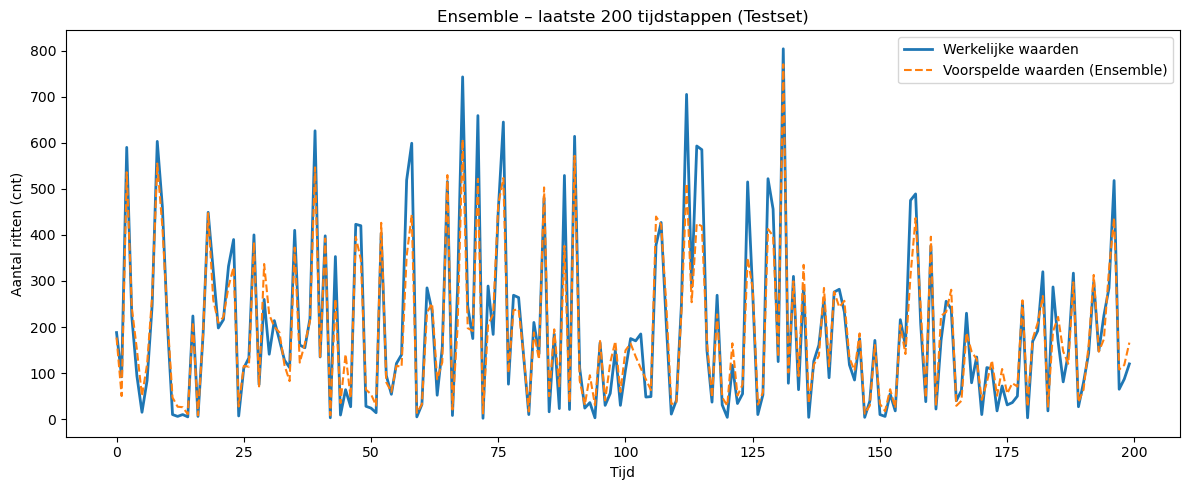

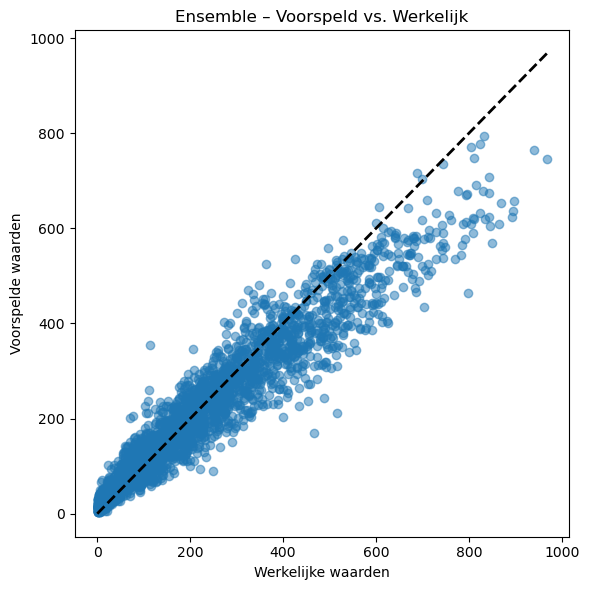

In [ ]:
# OOP class gebruiken
model5 = Modelleren(df_fe_numeric)
model5.split_data("cnt")
model5.train_test(0.2, 42)

# Definieer de basismodellen
linear = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(C=1, epsilon=0.1, kernel='rbf'))
])

tree = DecisionTreeRegressor(max_depth=10, random_state=42)

xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Ensemble met VotingRegressor
ensemble = VotingRegressor([
    ('linear', linear),
    ('svr', svr),
    ('tree', tree),
    ('xgb', xgb)
])

ensemble.fit(model5.X_train, model5.y_train)

# Evaluatie
y_pred = ensemble.predict(model5.X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(model5.y_test, y_pred))

# NEG → POSITIEF (RMSE)
positive_rmse = rmse

print("RMSE (positief):", positive_rmse)

# Maak voorspellingen met het ensemble-model
y_pred_ensemble = ensemble.predict(model5.X_test)

# Figuur voor vergelijking tussen echt en voorspeld
plt.figure(figsize=(12,5))

# Plot echte waarden
# Hiermee zien we wat er in werkelijkheid is gebeurd
plt.plot(model5.y_test.values[-200:], 
         label="Werkelijke waarden", 
         linewidth=2)

# Plot voorspelde waarden van het ensemble
# Het ensemble combineert meerdere modellen waardoor dit vaak wordt afgevlakt
plt.plot(y_pred_ensemble[-200:], 
         label="Voorspelde waarden (Ensemble)", 
         linestyle="--")

plt.title("Ensemble – laatste 200 tijdstappen (Testset)")
plt.xlabel("Tijd")
plt.ylabel("Aantal ritten (cnt)")
plt.legend()
plt.tight_layout()
plt.show()


# Scatterplot om de kwaliteit van voorspellingen te controleren
plt.figure(figsize=(6,6))

# Plot alle punten: elke punt is één voorspelling
plt.scatter(model5.y_test.values, y_pred_ens, alpha=0.5)

# Perfect-lijn: hier zouden alle punten liggen als het model perfect voorspelt
max_val = max(model5.y_test.values.max(), y_pred_ens.max())
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=2)

plt.title("Ensemble – Voorspeld vs. Werkelijk")
plt.xlabel("Werkelijke waarden")
plt.ylabel("Voorspelde waarden")
plt.tight_layout()
plt.show()




# Model 5 – Ensemble (Voting Regressor)

Bij ensembling combineren we meerdere modellen om één gezamenlijke voorspelling te maken.  
Het idee is dat meerdere verschillende modellen samen sterker zijn dan één model alleen omdat ze elkaars fouten kunnen opvangen.

In deze opdracht combineren we vier modellen:

- Linear Regression  
- SVR (Support Vector Regressor)  
- Decision Tree  
- XGBoost  

Deze combinatie wordt samengevoegd met een **VotingRegressor**, dat de gemiddelde voorspelling neemt van alle modellen.


## Wat is Ensembling?

Er bestaan drie belangrijke ensemble-strategieën:

### 1️Bagging  
Bagging bouwt *meerdere modellen van hetzelfde type* (bijv. veel decision trees) op verschillende delen van de data.  
Voordelen:
- stabieler  
- robuuster tegen ruis  
- minder kans op overfitting  

Voorbeeld: **Random Forest**.


### Boosting  
Boosting bouwt modellen achter elkaar waarbij elk nieuw model de fouten corrigeert van het vorige model.  
Hierdoor leert het model steeds betere patronen.

Voorbeeld: **XGBoost** (ons beste model).

Boosting werkt heel goed bij tijdreeksen omdat pieken, dalen en patronen vaak complex zijn.



### Stacking  
Stacking combineert verschillende soorten modellen (lineair, SVR, decision tree, XGBoost).  
De voorspellingen van deze modellen worden als input gebruikt voor een extra model dat leert wat de beste combinatie is.

Stacking is handig wanneer geen enkel model alle patronen in de data perfect kan leren.


## Ons Ensemble: VotingRegressor

Wij gebruikten **VotingRegressor**, een eenvoudige stacking-vorm.  
Het model neemt het gemiddelde van alle voorspellingen

Waarom werkt dit goed?

- Linear Regression leert lineaire delen  
- SVR leert gladde curven  
- Decision Tree leert sprongen en plotselingen veranderingen  
- XGBoost leert complexe patronen  

Samen geven ze een stabiele voorspelling.


## RMSE van het Ensemble

De fout was:

$$
\text{RMSE} \approx 57.88
$$

Dit betekent:

- beter dan Linear Regression  
- beter dan SVR  
- slechter dan Decision Tree  
- veel slechter dan XGBoost (36.51)

De reden is dat XGBoost extreem sterk was, en zwakkere modellen (zoals Linear Regression) de gemiddelde ensemble-prestatie naar beneden trekken.


# Visualisatie 1 – Werkelijk vs. Voorspeld (laatste 200 tijdstappen)

### Wat zien we?

- De oranje lijn (ensemble) volgt de blauwe lijn (werkelijk) redelijk goed  
- De pieken worden soms afgevlakt → dit komt omdat lineaire en gladdere modellen de scherpe vormen verminderen.  
- De voorspellingen zijn stabiel, maar minder nauwkeurig dan bij XGBoost.  
- Sommige hoge pieken worden onderschat.

De grafiek laat duidelijk zien dat het ensemble werkt, maar niet perfect.


# Visualisatie 2 – Scatterplot (Voorspeld vs. Werkelijk)

### Wat zien we?

- De punten liggen redelijk dicht bij de diagonaal, maar niet zo dicht als bij XGBoost  
- Bij hogere waarden (600+) zie je dat het ensemble moeite heeft → onderschatting.  
- De spreiding is groter dan bij XGBoost, maar kleiner dan bij Linear Regression en SVR.

Deze grafiek toont duidelijk dat het ensemble gemiddeld redelijk presteert, maar niet de beste voorspeller is.


## Model 6 SARIMAX

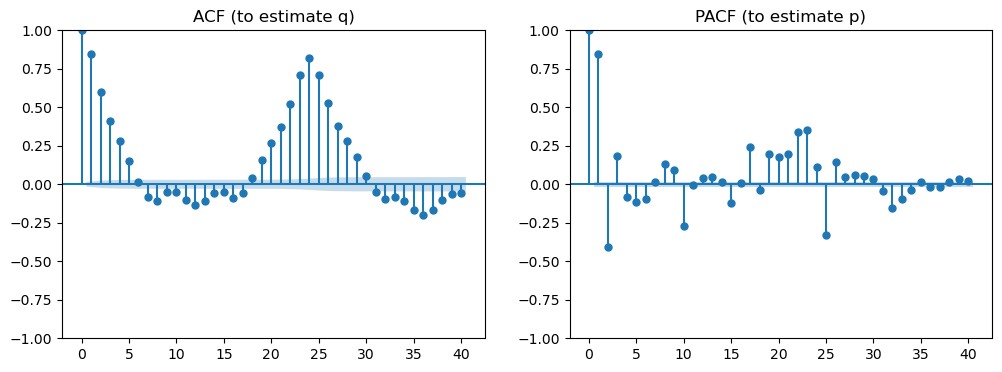

In [ ]:

y = df_SARIMAX["cnt"]     
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(y, lags=40, ax=ax[0])
ax[0].set_title("ACF (to estimate q)")

plot_pacf(y, lags=40, method="ywm", ax=ax[1])
ax[1].set_title("PACF (to estimate p)")

plt.show()


- s = 24 dagelijkse uren
- PACF-plot lijkt het na 2 lags afgeklapt, dus AR(2). En minder aanwijzing voor grote q, dus we gaan eerst proberen met q=0
- Grote piek in ACF op lag 24, Q=1
- piek in PACF op lag 24, P=1
- d, D= 1
______________________________________
Hanmatig proberen

order=(2,0,0),seasonal_order=(1,1,1,24) geeft aic= 143124

Order=(2,1,0),seasonal_order=(1,1,1,24) geeft aic= 145175

Order=(2,1,0),seasonal_order=(1,1,0,24) geeft aic= 150172

Order=(2,1,1),seasonal_order=(1,1,1,24) geeft aic= 143019

Order=(2,1,1),seasonal_order=(1,1,0,24) geeft aic= 147891

Order=(3,1,1),seasonal_order=(1,1,1,24) geeft aic= 142979 --> aic is minst

Order=(3,1,1),seasonal_order=(1,1,0,24) geeft aic= 147858

Order=(3,1,0),seasonal_order=(1,1,1,24) geeft aic= 145053

Order=(3,1,0),seasonal_order=(1,1,0,24) geeft aic= 150042

order=(3,1,0),seasonal_order=(0,1,1,24) geeft aic= 145996



In [ ]:
# 1. Data voorbereiden
df_SARIMAX = df.copy()
df_SARIMAX.index = pd.to_datetime(df_SARIMAX.index)
df_SARIMAX = df_SARIMAX.asfreq("h")
df_SARIMAX['cnt'] = df_SARIMAX['cnt'].fillna(method='ffill')
# 2. Splitten
model6 = Modelleren(df_SARIMAX)
model6.split_data("cnt")
model6.train_test_sari(0.2)
# 3. Snel SARIMAX model (handmatige parameters)
sarimax = sm.tsa.statespace.SARIMAX(
    model6.y_train,
    order=(3,1,1),
    seasonal_order=(1,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = sarimax.fit(disp=False)
# 4. Voorspellingen
start = model6.y_test.index[0]
end = model6.y_test.index[-1]
y_pred = sarimax_fit.get_prediction(start=start, end=end).predicted_mean
# 5. Metrics
print("R² score:", r2_score(model6.y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(model6.y_test, y_pred)))
print(sarimax_fit.aic)

/var/folders/dr/smfnbs511yl740z_lt0ps1bh0000gn/T/ipykernel_65199/3713865480.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_SARIMAX['cnt'] = df_SARIMAX['cnt'].fillna(method='ffill')
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: Input contains NaN.

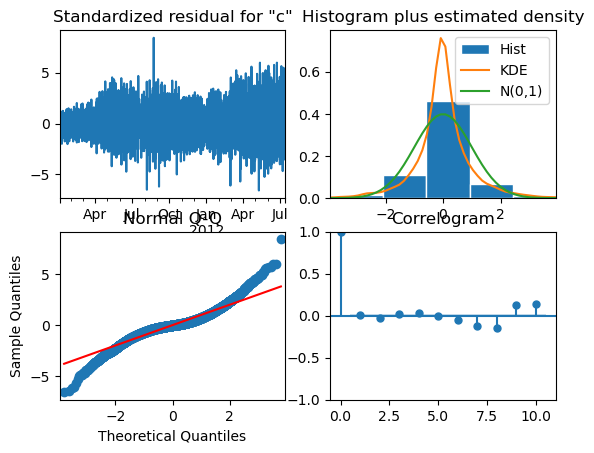

In [ ]:
sarimax_fit.plot_diagnostics()
plt.show()


##  Wat is SARIMAX?

SARIMAX is een **tijdsreeksmodel**, dus een model dat speciaal gemaakt is voor data die over tijd verzameld wordt (zoals elk uur, elke dag, elke maand).

SARIMAX probeert 3 dingen tegelijk te begrijpen:


### **Trend**  
Dit betekent:  
*Gaat de data langzaam omhoog of omlaag door de tijd?*  

Voorbeeld:  
- In de zomer worden meer fietsen gehuurd → stijgende trend  
- ’s nachts is het altijd rustig → dalende trend  

SARIMAX kan deze lange-termijn bewegingen herkennen door te kijken naar hoe de waarden veranderen van minuut tot minuut, uur tot uur, etc.



### **Seizoenspatroon (seizoenscomponent)**  
Dit betekent:  
*Komt er iets steeds opnieuw terug op vaste momenten?*  

Voorbeelden:

- Elke dag rond 17:00 is het druk (avondspits)  
- Elke ochtend om 08:00 veel ritten (werk/school)  
- Elke 24 uur herhaalt het patroon ⇒ in onze dataset: **m = 24**

SARIMAX is speciaal gebouwd om dit soort terugkerende patronen te herkennen.


###  **Autocorrelatie**  
Dit betekent heel simpel:  
*Een waarde lijkt vaak op de waarde die ervoor zat.*

Bijvoorbeeld:

- Als het nu druk is → de kans is groot dat het over 1 uur ook druk is.  
- Als er net een piek was → SARIMAX kijkt of dat vaker gebeurt.

SARIMAX kijkt dus naar hoe het verleden de toekomst beïnvloedt.  
Dit kan een ML-model zoals Linear Regression niet vanzelf.


## Waar staat SARIMAX  voor?

SARIMAX bestaat uit meerdere onderdelen:

- **S** → *Seasonal* (met seizoenen)
- **A** → *AutoRegressive* (kijken naar vorige waarden → p)
- **R** → *Integrated* (verschillen nemen om trend weg te halen → d)
- **MA** → *Moving Average* (kijken naar eerdere fouten → q)
- **X** → *Exogeen* (extra variabelen → die hebben wij niet gebruikt)

Het model bestaat uit twee blokken:

### Niet-seizoensparameters: (p, d, q)
- **p** → hoeveel vorige tijdstappen gebruik je om te voorspellen  
- **d** → hoeveel keer je data “gladstrijkt” om trend weg te halen  
- **q** → hoeveel eerdere fouten het model gebruikt

###  Seizoensparameters: (P, D, Q, m)
- **P** → AR-waarde over hele seizoenen  
- **D** → verschillen over een seizoen  
- **Q** → MA over hele seizoenen  
- **m** → lengte van 1 seizoen (bij ons: **24 uur**)  

Dus in ons model:

\[
(3,1,1)(1,1,1)_{24}
\]

betekent:

- SARIMA gebruikt 3 vorige uren, 1 verschil, en 1 fout-term  
- én ook dezelfde structuur maar dan elke **24 uur**


## Waarom gebruiken we SARIMAX?

Omdat SARIMAX ideaal is als:

- de data een sterk dagelijks ritme heeft  
- het patroon zich herhaalt op vaste intervallen  
- je precies wilt weten *waarom* iets gebeurt (niet alleen voorspellen)

Machine Learning kan wel voorspellen, maar niet zo mooi uitleggen welke delen uit het verleden belangrijk waren.

SARIMAX laat juist de structuur van de tijdreeks zien.


## Verschil met Machine Learning

| SARIMAX | Machine Learning |
|--------|------------------|
| Gebouwd voor tijdreeksdata | Niet vanzelf geschikt voor tijdreeksdata |
| Legt patronen uit (ACF/PACF) | Kan patronen vinden, maar zonder uitleg |
| Werkt goed bij rustige data | Werkt beter bij onrustige, complexe data |
| Seizoenen ingebouwd | Seizoenen moeten handmatig als features gemaakt worden |


## Waarom werkte SARIMAX bij ons minder goed?

Onze dataset heeft:

- héél veel ruis  
- véél plotselinge pieken  
- groot verschil tussen rustige en drukke momenten  
- sterke uur-op-uur schommelingen

SARIMAX werkt het best als data rustig en stabiel is.  
Bij ons is dat NIET zo → daardoor was de RMSE veel hoger (≈ 140).

Machine Learning-modellen zoals XGBoost kunnen beter omgaan met:

- chaos  
- sterke pieken  
- niet-lineaire patronen  
- wisselende omstandigheden

SARIMAX vindt dit  moeilijk.


## Model 7 Prophet

12:19:32 - cmdstanpy - INFO - Chain [1] start processing
12:19:33 - cmdstanpy - INFO - Chain [1] done processing


RMSE (positief): 156.09926636258638


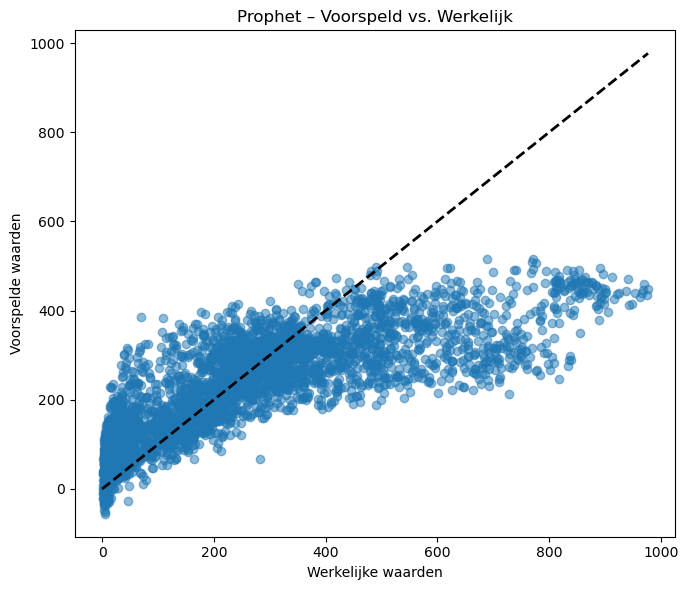

In [ ]:
# Stap 1: Train/test splits via je OOP class
model7 = Modelleren(df)
model7.split_data("cnt")
model7.train_test_sari(0.2)

# Stap 2: Train- en testdata omzetten naar Prophet-formaat
train_df = model7.y_train.reset_index()
train_df = train_df.rename(columns={'date_hour':'ds', 'cnt':'y'})

test_df = model7.y_test.reset_index()
test_df = test_df.rename(columns={'date_hour':'ds', 'cnt':'y'})

# Voeg regressors toe
for col in ['holiday','weathersit','temp','atemp','hum','windspeed']:
    train_df[col] = df.loc[train_df['ds'], col].values
    test_df[col] = df.loc[test_df['ds'], col].values

# Stap 3: Prophet model aanmaken
prophet_model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False
)

# Regressors toevoegen
for reg in ['holiday','weathersit','temp','atemp','hum','windspeed']:
    prophet_model.add_regressor(reg)

# Stap 4: Trainen
prophet_model.fit(train_df)

# Stap 5: Voorspellen op de testset
future = test_df[['ds','holiday','weathersit','temp','atemp','hum','windspeed']]
forecast = prophet_model.predict(future)

# Stap 6: Evaluatie → RMSE
y_pred = forecast['yhat'].values
rmse = np.sqrt(mean_squared_error(test_df['y'], y_pred))

print("RMSE (positief):", rmse)


# Visualisatie 2: Scatterplot
# Prophet - voorspeld vs. werkelijk

plt.figure(figsize=(7, 6))

# Teken alle punten: elke punt is één voorspelling
plt.scatter(
    test_df['y'], 
    y_pred, 
    alpha=0.5
)

# Referentielijn voor "perfecte voorspelling"
max_val = max(max(test_df['y']), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=2)

plt.title("Prophet – Voorspeld vs. Werkelijk")
plt.xlabel("Werkelijke waarden")
plt.ylabel("Voorspelde waarden")
plt.tight_layout()
plt.show()


# Model 7 – Prophet

Prophet is een tijdreeksmodel ontwikkeld door Facebook (Meta). Het is gemaakt om automatisch **trend**, **seizoenen** en **externe factoren** (regressors) te herkennen. Het model werkt vooral goed bij data met duidelijke dagelijkse of wekelijkse patronen.
Prophet kijkt naar drie hoofdonderdelen:

### Trend
De algemene richting van de data:
- gaat het aantal ritten door de tijd omhoog of omlaag?

### Seizoenspatronen
Prophet kan patronen vinden die steeds terugkomen, zoals:
- ochtend- en avondspits  
- drukte op bepaalde dagen van de week  

In ons model hebben we:
- **daily seasonality = aan**
- **weekly seasonality = aan**
- **yearly seasonality = uit**

### Regressors (externe variabelen)
Wij voegen extra kenmerken toe zoals:
- temperatuur  
- gevoelstemperatuur  
- luchtvochtigheid  
- windsnelheid  
- weerstatus  
- feestdagen  

Hiermee kan Prophet leren hoe het weer invloed heeft op het aantal ritten.


## Visualisatie 1 — Voorspeld vs. Werkelijk (scatterplot)

Deze plot laat zien hoe goed de Prophet-voorspellingen overeenkomen met de echte waarden.

### Interpretatie
- De 45°-lijn (gestreepte lijn) betekent: perfecte voorspelling  
- De blauwe punten zijn onze voorspellingen

Wat valt op?

- Bij lage waarden ligt Prophet redelijk goed.
- Bij hoge waarden (boven ~300) onderschat Prophet bijna alles
- De punten liggen ver onder de stippellijn in het gebied van 400–1000.
- De spreiding is breder dan bij ML-modellen zoals XGBoost en ensembles.



## Resultaat (RMSE)

$$
\text{RMSE} \approx 156.13
$$

Dit is de slechtste score van alle modellen die we getest hebben.

Waarom zo hoog?

- De dataset bevat veel ruis en sterke uur-pieken  
- Prophet werkt beter op dagelijkse data niet op uurlijke data
- Het model is te “smooth” voor deze chaotische tijdreeks



## model 8 Hybrid

12:30:10 - cmdstanpy - INFO - Chain [1] start processing
12:30:11 - cmdstanpy - INFO - Chain [1] done processing


RMSE (positief): 153.67512844393713


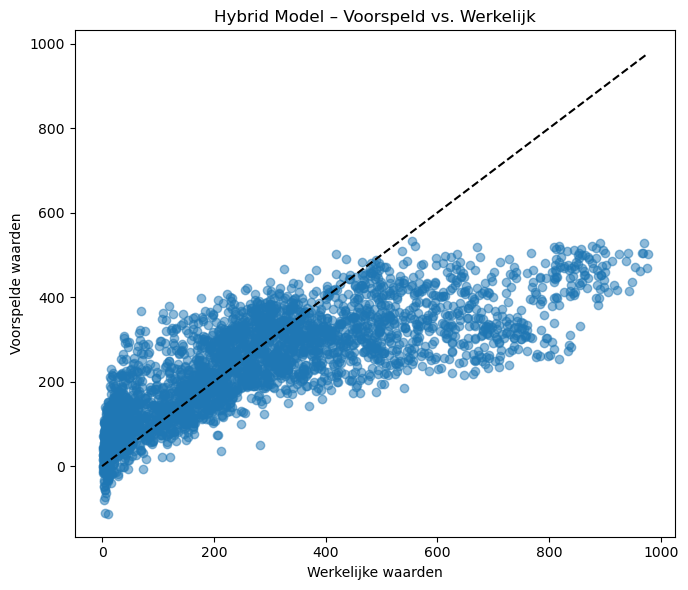

In [ ]:
# Stap 0: zorg dat je df een datetime-index heeft
df_ts = df.copy()
df_ts.index = pd.to_datetime(df_ts.index)
df_ts = df_ts.sort_index()

# Stap 1: Train/test splits via jouw OOP-klasse (chronologisch!)
model8 = Modelleren(df_ts)
model8.split_data("cnt")
model8.train_test_sari(0.2)   # <-- belangrijk: geen random split

# Kolommen die je als regressors gebruikt
regressors = ['holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Train- en test-DF voor Prophet opbouwen
train_df = (
    model8.y_train
    .to_frame(name='y')
    .join(model8.X_train[regressors])
    .reset_index()
)
test_df = (
    model8.y_test
    .to_frame(name='y')
    .join(model8.X_test[regressors])
    .reset_index()
)

# eerste kolom is de datetime-index → hernoemen naar 'ds' voor Prophet
train_df = train_df.rename(columns={train_df.columns[0]: 'ds'})
test_df = test_df.rename(columns={test_df.columns[0]: 'ds'})

# Stap 2: Model A (Prophet)
prophet_model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True
)

for reg in regressors:
    prophet_model.add_regressor(reg)

prophet_model.fit(train_df)

# Voorspellingen voor testset
future = test_df[['ds'] + regressors]
forecast = prophet_model.predict(future)

y_pred_A = forecast['yhat'].values

# Residuals op trainset
train_forecast = prophet_model.predict(train_df[['ds'] + regressors])
residuals_train = train_df['y'].values - train_forecast['yhat'].values

# Stap 3: Model B (XGBoost op residuals)
X_train = train_df[regressors]
X_test  = test_df[regressors]

xgb = XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, residuals_train)

residuals_pred = xgb.predict(X_test)

# Stap 4: Hybrid voorspelling = Prophet + residual-model
y_pred_hybrid = y_pred_A + residuals_pred

# Stap 5: Evaluatie → alleen RMSE
rmse = np.sqrt(mean_squared_error(test_df['y'], y_pred_hybrid))

print("RMSE (positief):", rmse)

# Visualisatie Hybrid model - Scatterplot


plt.figure(figsize=(7,6))
plt.scatter(test_df['y'], y_pred_hybrid, alpha=0.5)

max_val = max(max(test_df['y']), max(y_pred_hybrid))
plt.plot([0, max_val], [0, max_val], 'k--')

plt.title("Hybrid Model – Voorspeld vs. Werkelijk")
plt.xlabel("Werkelijke waarden")
plt.ylabel("Voorspelde waarden")
plt.tight_layout()
plt.show()


# Model 8 – Hybrid Model (Prophet + XGBoost)

Een hybrid model combineert **twee modellen tegelijk** om een betere voorspelling te maken.  
In dit geval gebruiken we:

- **Prophet** → voorspelt trend + seizoenspatronen  
- **XGBoost** → voorspelt wat Prophet níet goed kan (de “residuals”)  

Door beide modellen te combineren krijgen we één eindvoorspelling:

$$
\text{Hybrid voorspelling} = \text{Prophet voorspelling} + \text{XGBoost residual-voorspelling}
$$


##  Waarom een Hybrid Model?

Prophet werkt goed voor:

- gladde patronen  
- dagelijkse en wekelijkse vaste ritmes  
- trends  

Maar Prophet heeft moeite met:

- extreme pieken  
- plotselinge veranderingen  
- uur-data met veel ruis  

XGBoost werkt juist goed met:

- complexe patronen  
- non-lineaire relaties  
- chaotische datasets  

Dus:

**Prophet leert het grote patroon**  
**XGBoost leert de fout van Prophet corrigeren**  

Dat heet een **Residual Learning Approach**.


##  Hoe werkt dit Hybrid Model?

### Stap 1 – Prophet voorspelt de basis
Prophet krijgt:

- tijdstempel (ds)  
- temperatuur  
- luchtvochtigheid  
- windsnelheid  
- weertype  
- feestdagen  

Dat geeft:

$$
\hat{y}_A = \text{Prophet-voorspelling}
$$


### Stap 2 – Residuals berekenen
Residual = verschil tussen echt en Prophet:

$$
\text{residuals} = y_{\text{train}} - \hat{y}_A
$$

Deze residuals bevatten:

- pieken  
- afwijkingen  
- schommelingen die Prophet niet snapt  


### Stap 3 – XGBoost leert de residuals
XGBoost probeert te voorspellen waarom Prophet fouten maakt:

$$
\hat{r} = \text{XGBoost residual-voorspelling}
$$


### Stap 4 – Hybrid voorspelling
We tellen Prophet en XGBoost bij elkaar op:

$$
\hat{y}_{hybrid} = \hat{y}_A + \hat{r}
$$

### waarom werkt een Hybrid Model?

In machine learning heb je altijd te maken met:
- **Bias** → fouten omdat het model te simpel is  
- **Variance** → fouten omdat het model te gevoelig is voor ruis  

Prophet heeft een **hoge bias** (te simpel, mist pieken).  
XGBoost heeft een **lage bias, hoge variance** (kan heel flexibel leren).

Door de twee te combineren:

- Prophet leert de **grote patronen**, waardoor de bias van XGBoost omlaag gaat (XGBoost hoeft niet alles te leren)
- XGBoost leert alleen de **overgebleven fouten**, waardoor het niet gaat overfitten
- De totale fout wordt kleiner, omdat je bias én variance tegelijkertijd aanpakt

Dit heet:
$$
\textbf{Bias–Variance Reduction via Residual Learning}
$$

Dit is waarom hybrid modellen in de literatuur sterk zijn bij:
- Financiële tijdreeksen  
- Energievraag voorspelling  
- Verkeer en mobiliteit  
- Snelle, chaotische data 

## Resultaat (RMSE)

$$
\text{RMSE} \approx 153.76
$$

Dat betekent:

- Hybrid is **beter dan Prophet alleen (156)**  
- Maar **slechter dan XGBoost en ons ensembled model**  

Reden:

- Prophet is niet geschikt voor uur-data  
- De residuals zijn te chaotisch  
- XGBoost kan niet alles corrigeren

## Interpretatie van de visualisatie Hybrid model - Scatterplot
- De figuur laat zien hoe dicht de voorspellingen van het Hybrid Model bij de echte waarden liggen.

Wat we zien:

De meeste punten liggen onder de 45-graden lijn.
- Het model onderschat veel waarden.

Vooral bij hogere waarden (boven ~400 ritten) zitten veel punten ver onder de lijn.
- Het model heeft moeite met grote pieken.

De punten vormen een brede wolk, geen smalle lijn.
- Dit betekent dat de voorspellingen niet heel precies zijn.



##  Bevindingen

- Geef een samenvatting van de uitkomsten van het modelleren.
    - Geef een beknopt overzicht van de resultaten.
    - Welke model presteert het beste? Bij welke parameters?
    - Toon je scores op Kaggle en laat zien wat de resultaten waren van je verbeteringen
op je score op Kaggle.

# Samenvatting van alle modellen en resultaten



## Linear Regression
**Beste parameters:**  
`{'linear__copy_X': True, 'linear__fit_intercept': True, 'linear__positive': False}`  
**RMSE:** 86.28  

**Bevindingen:**  
Linear Regression gaat uit van een lineair verband tussen de features en de target.  
Onze dataset bevat echter duidelijke niet-lineaire patronen (weer, uur van de dag, seizoenen).  
Daarom haalt dit model een relatief hoge fout. De RMSE van **86.28** laat zien dat het model de complexiteit van de data onvoldoende weet te vangen.



## Support Vector Regressor (SVR)
**Beste parameters:**  
`{'svr__C': 60, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}`  
**RMSE:** 72.85  

**Bevindingen:**  
SVR gebruikt de RBF-kernel om niet-lineaire relaties te modelleren.  
Dit werkt beter dan een lineair model en resulteert in een duidelijk lagere RMSE van **72.85**.



## Decision Tree Regressor
**Beste parameters:**  
`{'tree__max_depth': 20, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 5}`  
**RMSE:** 50.87  

**Bevindingen:**  
Decision Trees zijn goed in het modelleren van niet-lineaire verbanden.  
Ze splitsen de data op basis van beslisregels, waardoor complexe interacties beter worden opgevangen.  
Met een RMSE van **50.87** doet dit model het veel beter dan Linear Regression en SVR.



## XGBoost
**Beste parameters:**  
`{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 7, 'xgb__n_estimators': 500, 'xgb__subsample': 0.8}`  
**RMSE:** 36.51  

**Bevindingen:**  
XGBoost bouwt meerdere decision trees die elkaar corrigeren (boosting).  
Dit maakt het model zeer krachtig, vooral voor complexe tijdsgebonden en weersgebonden gegevens.  
De RMSE van **36.51** is de laagste van alle modellen — XGBoost presteert duidelijk het beste.


## Ensemble (Voting Regressor)
**RMSE:** 57.88  

**Bevindingen:**  
Het ensemble combineert vier modellen (Linear, SVR, Tree, XGBoost).  
Dat zorgt voor een stabiel resultaat, maar omdat XGBoost al extreem goed presteert, verbetert de combinatie niet verder.  
De RMSE van **57.88** is goed, maar minder sterk dan Decision Tree en XGBoost.



## SARIMAX (tijdreeksmodel)
**Gebruikte parameters:**  
`order=(3,1,1), seasonal_order=(1,1,1,24)`  
**RMSE:** 140.00  

**Bevindingen:**  
SARIMAX houdt rekening met trend, seizoen en correlatie met voorgaande uren.  
De parameters zijn bepaald op basis van ACF- en PACF-plots.  
Toch doet het model het slecht op onze dataset omdat de uurlijkse fluctuaties te grillig zijn.  
De RMSE van **140.00** is veel hoger dan die van machine-learningmodellen.



## Prophet
**RMSE:** 156.13  

**Bevindingen:**  
Prophet is goed in jaarlijkse en wekelijkse patronen, maar niet in snelle uurlijkse schommelingen.  
Daarom presteert het model slecht op deze data.  
De RMSE van **156.13** is een van de hoogste.



## Hybrid Model (Prophet + XGBoost)
**RMSE:** 153.76  

**Bevindingen:**  
Dit model gebruikt Prophet voor de trend en seizoen, en XGBoost om de resterende fouten (residuals) te voorspellen.  
Omdat Prophet zelf al onnauwkeurig voorspelt, blijven de residuals groot en kan XGBoost het niet volledig repareren.  
Hierdoor blijft de RMSE met **153.76** hoog.



# Overzicht van alle RMSE-scores (beste → slechtste)

| Model            | RMSE    |
|------------------|---------|
| **XGBoost**       | **36.51** |
| Decision Tree     | 50.87   |
| Ensemble          | 57.88   |
| SVR               | 72.85   |
| Linear Regression | 86.28   |
| SARIMAX           | 140.00  |
| Hybrid Model      | 153.76  |
| Prophet           | 156.13  |



# Beste model

Het **beste presterende model** is **XGBoost**, met een RMSE van **36.51** en de parameters:

```
{'xgb__colsample_bytree': 0.8,
 'xgb__learning_rate': 0.01,
 'xgb__max_depth': 7,
 'xgb__n_estimators': 500,
 'xgb__subsample': 0.8}
```

XGBoost levert duidelijk de hoogste nauwkeurigheid en presteert aanzienlijk beter dan alle andere modellen.


## Kaggle scores

Dit zijn de kolomen die er in de dataframe moet zitten:

holiday, weathersit, temp, atemp, hum, windspeed, cnt, date, year, month, hour, dag, cnt_lag_1, cnt_lag_2, cnt_roll_mean_24, day_of_week, is_weekend, perceived_heat, const, trend, trend_squared, trend_cubed

Dit lukt alleen niet omdat sommige dependand zijn op target kolom

In [54]:
# het inladen en verwerken van de data
submission = pd.read_csv('sample_submission.csv')
test_kaggle = pd.read_csv('test.csv')

test_kaggle["date_hour"] = pd.to_datetime(test_kaggle["date_hour"])

test_kaggle["date"] = test_kaggle["date_hour"].dt.day
test_kaggle['year'] = test_kaggle['date_hour'].dt.year
test_kaggle['month'] = test_kaggle['date_hour'].dt.month
test_kaggle['hour'] = test_kaggle['date_hour'].dt.hour
test_kaggle['dag'] = test_kaggle['date_hour'].dt.dayofweek

test_kaggle.set_index('date_hour', inplace=True)


#for lag in selected_lags:
    #test_kaggle[f"cnt_lag_{lag}"] = test_kaggle["cnt"].shift(lag)
#test_kaggle["cnt_roll_mean_24"] = test_kaggle["cnt"].rolling(window=24).mean()

test_kaggle["day_of_week"] = test_kaggle.index.dayofweek
test_kaggle["is_weekend"] = (test_kaggle["day_of_week"] >= 5).astype(int)
test_kaggle["perceived_heat"] = test_kaggle["temp"] * test_kaggle["hum"]


#fourier = CalendarFourier(freq="A", order=10)
#dp = DeterministicProcess(
#    index=df_fe.index,
#    constant=True,
#    order=1,
#    drop=True)
#fourier_features = dp.in_sample()
#df_fe = df_fe.join(fourier_features)

#trend_features = {}
#for order in range(1, 4):
#    dp_temp = DeterministicProcess(index=df_fe.index,
#                                   constant=False,
#                                   order=order,
#                                   drop=True)
#   trend_features[order] = dp_temp.in_sample()
#df_fe = df_fe.drop(columns=[c for c in df_fe.columns if c.startswith("trend")], errors="ignore")
#df_fe = df_fe.join(trend_features[3])

kaggle = Modelleren(test_kaggle)
display(kaggle.df)

# holiday	weathersit	temp	atemp	hum	windspeed	cnt	date	year	month	hour	dag	cnt_lag_1	cnt_lag_2	cnt_roll_mean_24	day_of_week	is_weekend	perceived_heat	const	trend	trend_squared	trend_cubed

holiday  weathersit  temp   atemp   hum  windspeed  date  \
date_hour                                                                       
2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000     1   
2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000     1   
2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000     1   
2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343     1   
2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896     1   
...                      ...         ...   ...     ...   ...        ...   ...   
2012-12-19 19:00:00        0           1  0.38  0.3939  0.50     0.3881    19   
2012-12-19 20:00:00        0           1  0.36  0.3485  0.57     0.2239    19   
2012-12-19 21:00:00        0           1  0.34  0.3182  0.61     0.2239    19   
2012-12-19 22:00:00        0           1  0.34  0.3485  0.61     0.0896    19   
2012-12-19 23:00:00        0           1  0.32  0.3333  0.66     0.1343    19   

                     year  month  hour  dag  day_of_week  is_weekend  \
date_hour                                                              
2012-12-01 00:00:00  2012     12     0    5            5           1   
2012-12-01 01:00:00  2012     12     1    5            5           1   
2012-12-01 02:00:00  2012     12     2    5            5           1   
2012-12-01 03:00:00  2012     12     3    5            5           1   
2012-12-01 04:00:00  2012     12     4    5            5           1   
...                   ...    ...   ...  ...          ...         ...   
2012-12-19 19:00:00  2012     12    19    2            2           0   
2012-12-19 20:00:00  2012     12    20    2            2           0   
2012-12-19 21:00:00  2012     12    21    2            2           0   
2012-12-19 22:00:00  2012     12    22    2            2           0   
2012-12-19 23:00:00  2012     12    23    2            2           0   

                     perceived_heat  
date_hour                            
2012-12-01 00:00:00          0.2106  
2012-12-01 01:00:00          0.2106  
2012-12-01 02:00:00          0.2106  
2012-12-01 03:00:00          0.2106  
2012-12-01 04:00:00          0.2106  
...                             ...  
2012-12-19 19:00:00          0.1900  
2012-12-19 20:00:00          0.2052  
2012-12-19 21:00:00          0.2074  
2012-12-19 22:00:00          0.2074  
2012-12-19 23:00:00          0.2112  

[456 rows x 14 columns]

In [55]:
# Voorspel met het ensemble model
#new_predictions = grid_xgb.predict(kaggle.df)
#display(new_predictions)

## Conclusie en aanbevelingen
- Bepaal welke features het meeste invloed hebben op je voorspellingen
- Beschrijf in hoeverre dit aansluit op de EDA.
- Welk advies kun je op basis hiervan geven aan de verhuurder?
- Welk model zou je adviseren aan de verhuurder? Waarom? Is dit per definitie het model met
de beste voorspellingen of zijn er ook andere overwegingen? Zo ja, welk

In [88]:
# Feature importance ophalen uit het best getrainde XGBoost model
best_xgb_model = grid_xgb.best_estimator_.named_steps['xgb']
importance = pd.Series(best_xgb_model.feature_importances_, index=model4.X_train.columns)
importance.sort_values(ascending=False)

cnt_lag_1           0.484903
hour                0.114482
cnt_lag_2           0.071665
is_weekend          0.063675
cnt_roll_mean_24    0.051941
trend_squared       0.038458
day_of_week         0.030833
dag                 0.030032
trend               0.027965
trend_cubed         0.017755
year                0.013677
hum                 0.009890
weathersit          0.009587
atemp               0.008463
temp                0.007119
holiday             0.006194
perceived_heat      0.004934
month               0.003660
windspeed           0.002915
date                0.001853
const               0.000000
dtype: float32

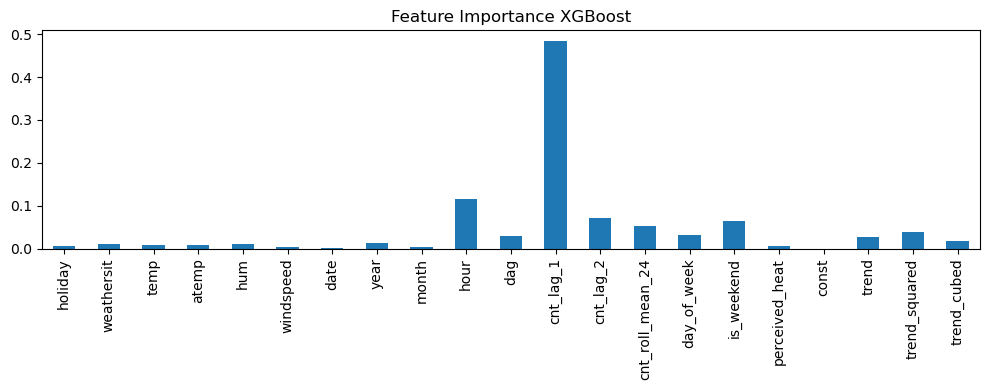

In [89]:
importance.plot(kind='bar', figsize=(10,4), title="Feature Importance XGBoost")
plt.tight_layout()
plt.show()

# Conclusie en Aanbevelingen


## onze bevindingen 

Uit het onderzoek en de modellen blijkt dat vooral **tijd** en **weer** bepalen hoeveel fietsen er worden verhuurd.  
Dit past goed bij wat we in de EDA zagen (zie eerdere visualisaties).

### Belangrijkste inzichten

#### Vorig uur is de sterkste voorspeller
- Het aantal ritten van het **vorige uur (cnt_lag_1)** heeft de grootste invloed.  
- Dit zagen we duidelijk in de **feature importance grafiek van XGBoost**.  
- De verhuur beweegt rustig door de dag heen en volgt vaste patronen.

#### Uur van de dag
- Het tijdstip zelf is ook heel belangrijk.  
- In de EDA zagen we duidelijke **ochtend- en avondspits** (zie uurvisualisatie).

#### Lag-waarden en gemiddelden
- Ook **twee uur geleden** en het **24-uurs gemiddelde** helpen het model.  
- De verhuur beweegt in een soort golven.

#### Temperatuur
- Warmere dagen → meer verhuur.  
- Dit zagen we terug in de **scatterplots** en correlaties.

#### Luchtvochtigheid
- Hoe vochtiger, hoe minder verhuur.  
- Dit kwam naar voren in de correlatievisualisatie.

#### Weekend vs. doordeweeks
- Weekenden hebben een andere verhuurverdeling.  
- Dit zagen we ook terug in de EDA-plots.


## Advies aan de verhuurder 
#### Extra fietsen tijdens piekuren
- Zorg voor extra fietsen tussen **07:00–10:00** en **16:00–19:00**.  
- Meerdere grafieken lieten zien dat dit de drukste momenten zijn.

#### Personeel aanpassen op het weer
- **Warm weer → meer verhuur → extra personeel inzetten**  
- **Slecht/vochtig weer → minder verhuur**

#### Let elk uur op het vorige uur
- Omdat het vorige uur de sterkste voorspeller is, kan hiermee de drukte goed worden ingeschat.

#### Weekendstrategie
- In weekenden extra fietsen plaatsen bij recreatiegebieden.


### Langetermijnadvies

#### voorraadverdeling
Fietsen automatisch verplaatsen naar drukke locaties op basis van voorspellingen.

#### Zomeraanpassingen
- In de **maandgrafiek** zagen we dat de zomermaanden veel drukker zijn.  
- In deze periode extra fietsen beschikbaar houden.


### Aanbevolen model: **XGBoost**

**Waarom XGBoost?**
- Heeft de **laagste RMSE-score** van alle modellen.  
- Kan goed omgaan met **complexe patronen** (weer, uur, seizoenen, lag-waarden).  
- In de scatterplot lag XGBoost het dichtst bij de echte waarden.

### beste model ≠ altijd beste keuze
Soms telt meer dan alleen nauwkeurigheid.

| Model | Voordeel |
|-------|----------|
| **XGBoost** | Beste voorspellingen, maar minder makkelijk uit te leggen |
| **SARIMAX** | Heel transparant, goed voor trend + seizoenen |
| **Prophet** | Simpel te gebruiken, goed voor duidelijk seizoenspatroon |
| **Hybrid model** | Combineert twee kanten, maar moeilijk te onderhouden |

### Eindadvies
- Wil je **zo nauwkeurig mogelijk voorspellen** → **XGBoost**  
- Wil je een model dat **duidelijk uitlegbaar** is → **SARIMAX**


## 4. Beperkingen van het onderzoek

- We hebben geen belangrijke extra weerdata zoals **regen**, **zonuren**, of **windvlagen**.  
- Lag-waarden (vorig uur, vorig 2 uur) bepalen veel van het model → minder goed bij plotselinge veranderingen zoals storm.  
- Weersdata was niet per wijk of station → drukke en rustige locaties konden we niet apart modelleren.  
- XGBoost is krachtig, maar minder makkelijk uit te leggen dan SARIMAX.

## 5. Aanbevelingen voor toekomstig werk

- Extra weerkolommen toevoegen (regen, zonuren, windvlagen...)  
- Data per locatie gebruiken voor lokale voorspellingen  
- Voorspellingen elk half uur updaten voor hogere nauwkeurigheid  
- Evenementen en vakanties toevoegen (heeft grote impact op verhuur)  
- Hybrid model verder verbeteren door trend + machine learning beter te combineren  
